# Import Data

In [1]:
import numpy as np
import pandas as pd
import os 
import torch
import torch.nn as nn
import cv2
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [2]:
labels=[]
data=[]

In [3]:
folder_path= "images"
folders = os.listdir(folder_path)

for folder in folders:
    pathPerFolder=os.path.join(folder_path,folder);
    folderChild= os.listdir(pathPerFolder)
    for file in folderChild:
        img_path=os.path.join(pathPerFolder,file)
        img=cv2.imread(img_path)
        img = cv2.resize(img, (64,64))
        img= img/255.0
        frames=img
        data.append(img)
        labels.append(folder)
        
data=np.array(data,dtype=np.float32)
labels=np.array(labels)
print(f'Data shape: {data.shape}')
print(f'Labels shape: {labels.shape}')

Data shape: (5243, 64, 64, 3)
Labels shape: (5243,)


In [4]:
data[0].shape
sp1,sp2,sp3,sp4=data.shape
sp2
print(sp2*sp3*sp4)

12288


In [5]:
data[0][0][0]

array([0., 0., 0.], dtype=float32)

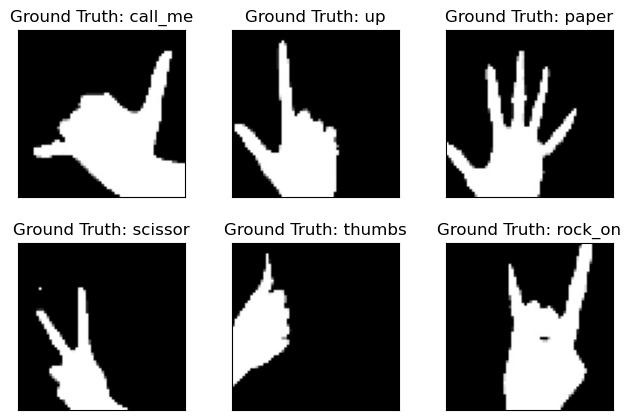

In [6]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  rand_index = np.random.randint(0, data.shape[0])
  plt.imshow(data[rand_index])
  plt.title("Ground Truth: {}".format(labels[rand_index]))
  plt.xticks([])
  plt.yticks([])
fig
plt.show()

In [7]:
np.unique(labels)

array(['call_me', 'fingers_crossed', 'okay', 'paper', 'peace', 'rock',
       'rock_on', 'scissor', 'thumbs', 'up'], dtype='<U15')

In [8]:
#mapping ke int
unique_labels = np.unique(labels)
print(unique_labels)
mapping = {label: i for i, label in enumerate(unique_labels)}
labelsFinal = [mapping[label] for label in labels]

#for i in range(len(labels)):
#    labelsFinal[i]=labelsFinal[i]/10;
    
labelsFinal

['call_me' 'fingers_crossed' 'okay' 'paper' 'peace' 'rock' 'rock_on'
 'scissor' 'thumbs' 'up']


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [9]:
 torch.tensor(labelsFinal).unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
torch.tensor(data)

tensor([[[[0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]],

         ...,

         [[1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          ...,
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]],

         [[1.0000, 1.0000, 1.0000],
          [1.0000

# Modeling Data

In [11]:
data_tensor = torch.tensor(data)
labels_tensor = torch.tensor(labelsFinal)

rand_idx = torch.randperm(len(data_tensor))


data_tensor = data_tensor[rand_idx]
labels_tensor = labels_tensor[rand_idx]


x_trains = data_tensor.reshape(-1, sp2*sp3*sp4)
y_trains = labels_tensor


split = int(0.8*len(x_trains))
x_train = x_trains[:split]
y_train = y_trains[:split]
x_testing = x_trains[split:]
y_testing = y_trains[split:]

In [12]:
y_train

tensor([3, 2, 7,  ..., 6, 8, 7])

In [13]:
x_train

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [16]:
x_train.unique()

tensor([0.0000, 0.0039, 0.0078, 0.0118, 0.0157, 0.0196, 0.0235, 0.0275, 0.0314,
        0.0353, 0.0392, 0.0431, 0.0471, 0.0510, 0.0549, 0.0588, 0.0627, 0.0667,
        0.0706, 0.0745, 0.0784, 0.0824, 0.0863, 0.0902, 0.0941, 0.0980, 0.1020,
        0.1059, 0.1098, 0.1137, 0.1176, 0.1216, 0.1255, 0.1294, 0.1333, 0.1373,
        0.1412, 0.1451, 0.1490, 0.1529, 0.1569, 0.1608, 0.1647, 0.1686, 0.1725,
        0.1765, 0.1804, 0.1843, 0.1882, 0.1922, 0.1961, 0.2000, 0.2039, 0.2078,
        0.2118, 0.2157, 0.2196, 0.2235, 0.2275, 0.2314, 0.2353, 0.2392, 0.2431,
        0.2471, 0.2510, 0.2549, 0.2588, 0.2627, 0.2667, 0.2706, 0.2745, 0.2784,
        0.2824, 0.2863, 0.2902, 0.2941, 0.2980, 0.3020, 0.3059, 0.3098, 0.3137,
        0.3176, 0.3216, 0.3255, 0.3294, 0.3333, 0.3373, 0.3412, 0.3451, 0.3490,
        0.3529, 0.3569, 0.3608, 0.3647, 0.3686, 0.3725, 0.3765, 0.3804, 0.3843,
        0.3882, 0.3922, 0.3961, 0.4000, 0.4039, 0.4078, 0.4118, 0.4157, 0.4196,
        0.4235, 0.4275, 0.4314, 0.4353, 

# Layer

In [31]:
class Layer:
    def __init__(self,weight,bias):
        self.weight=weight;
        self.bias=bias;
    
    def activationSigmoid(self,input) : #Sigmoid
        sigmoid = torch.sigmoid(input)
        return sigmoid
    
    def activationRelu(self,input) : #ReLu
        m = nn.ReLU()
        return m(input)
    
    def activationSM(self,input) : #SoftMax
        #A = torch.exp(input) / torch.sum(torch.exp(input))
        #return A
        m = nn.Softmax(dim=1)
        return m(input)
   
    def dSigmoid(self,input):
        sigmoid=torch.sigmoid(input)
        return sigmoid * (1-sigmoid)
    
    def dRelu(self,input):
        return torch.where(input>0,1.0,0.0)
    
    def dSoftMax(self,input):
        sm=torch.softmax(input,dim=1)
        return sm * (1-sm)
        
    def forward1(self, input) :
         input = input.float()
         output = (torch.matmul(input, self.weight)) + self.bias
         return output, self.activationRelu(output)
       
    def forward2(self, input) :
        output=(torch.matmul(input,self.weight))+self.bias
        return output,self.activationSigmoid(output)
    
    def forward3(self, input) :
        output=(torch.matmul(input, self.weight)) + self.bias
        #return output, self.activationSM(output)
        return output, output

# Network

In [18]:
class Network:
    def __init__(self,w1,b1,w2,b2,w3,b3,batch_size=10):
        self.batch_size=batch_size;
        self.w1=w1
        self.b1=b1
        self.w2=w2
        self.b2=b2
        self.w3=w3
        self.b3=b3
        self.layer1=Layer(self.w1,self.b1)
        self.layer2=Layer(self.w2,self.b2)
        self.layer3=Layer(self.w3,self.b3)
        
    def forward1(self,x):
        pred,a=self.layer1.forward1(x)
        return pred,a
    
    def forward2(self,x):
        pred,a=self.layer2.forward2(x)
        return pred,a
    
    def forward3(self,x):
        pred,a=self.layer3.forward3(x)
        return pred,a
    
    def backPropLayer3(self,Z1, A1, Z2, A2, A3,W1,W2,W3, X, Y,m):
        dZ3=A3-Y;
        dW = (1/m) * A2.T @ dZ3
        dB = (1/m) * torch.sum(dZ3, dim=0)
        return self.backPropLayer2(dZ3,A1,Z1, A2,Z2,W1,W2,W3,X, Y,m,dW,dB);
        
    def backPropLayer2(self,dZ3,A1,Z1, A2,Z2,W1,W2,W3,X, Y,m,dW3,db3):
        dZ2 = (dZ3.float() @ W3.T.float()) * self.layer2.dSigmoid(Z2.float())
        dW = (1/m) * A1.T.float() @ dZ2.float()
        db = 1 / m * torch.sum(dZ2, dim=0)
        return self.backPropLayer1(dZ2,dZ3,A1,Z1, A2,Z2,W1,W2,X, Y,m,dW3,db3,dW,db)
        
    def backPropLayer1(self,dZ2,dZ3,A1,Z1, A2,Z2,W1,W2,X, Y,m,dW3,db3,dW2,db2):
        dZ1 = (dZ2.float()@W2.T.float()) * self.layer1.dRelu(Z1.float())
        dW = (1/m) * X.T.float() @ dZ1.float()
        db = 1 / m * torch.sum(dZ1, dim=0)
        return dW, db, dW2, db2, dW3, db3
    
    def single_processing(self,input):
        pred1,error1=self.forward1(input)
        pred2,error2=self.forward2(error1)
        pred3,error3=self.forward3(error2)
        return pred1,error1,pred2,error2,pred3,error3
    
    def batch_processing(self,input,target):
        for i in range(0,len(input)-1,self.batch_size):
            new_len = [input[j].tolist() for j in range(i, i+self.batch_size)]
            new_ten=torch.Tensor(new_len)
            new_tar = [target[j].tolist() for j in range(i, i+self.batch_size)]
            new_tar2=torch.Tensor(new_tar)
            self.single_processing(new_ten,new_tar2)

# Training

In [81]:
class Training:
    def __init__(self,x_train,y_train,seed=52,learning_rate=0.1,epoch=1000,stop=8):
        self.seed=seed
        torch.manual_seed(self.seed)
        randData=torch.randperm(len(x_train))
        self.x_train=x_train[randData];
        self.y_train=y_train[randData];
        self.m=x_train.shape[1]
        self.learning_rate=learning_rate;
        self.w1=torch.randn((self.m,512), dtype=torch.float32) * np.sqrt(1./(512))
        self.b1=torch.randn((512), dtype=torch.float32) * np.sqrt(1./(512))
        self.w2=torch.randn((512,64), dtype=torch.float32) * np.sqrt(1./(64))
        self.b2=torch.randn((64), dtype=torch.float32) * np.sqrt(1./(64))
        self.w3=torch.randn((64,10), dtype=torch.float32) * np.sqrt(1./(10))
        self.b3=torch.randn((10), dtype=torch.float32) * np.sqrt(1./(10))
        self.epoch=epoch
        self.learning_rate=learning_rate
        self.stop=stop
        self.model=Network(self.w1,self.b1,self.w2,self.b2,self.w3,self.b3)
   
    def convertY(self,Y):
         Y_res = torch.zeros((len(Y), 10))
         Y_res[torch.arange(len(Y)), Y.long()] = 1
         return Y_res
        
    def forward_prop(self,X):
        pred1,error1,pred2,error2,pred3,error3=self.model.single_processing(X)
        return pred1.double(), error1.double(), pred2.double(), error2.double(), pred3.double(), error3.double()
    
    def backward_prop(self,Z1, A1, Z2, A2, A3,W1,W2,W3, X, Y):
        dW, db, dW2, db2, dW3, db3=self.model.backPropLayer3(Z1, A1, Z2, A2, A3,self.w1,self.w2,self.w3, self.x_train, self.convertY(self.y_train),self.m)
        return torch.tensor(dW), torch.tensor(db), torch.tensor(dW2), torch.tensor(db2),torch.tensor(dW3), torch.tensor(db3)
    
    def update_params(self, dW1, db1, dW2, db2, dW3, db3):
        self.w1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.w2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.w3 -= self.learning_rate * dW3
        self.b3 -= self.learning_rate * db3
    
    def get_predictions(self,A):
        #print(torch.argmax(A, dim=1))
        #return torch.argmax(A, 0)
        A_sm = torch.softmax(A, dim=1) 
        return torch.argmax(A_sm, dim=0)

    def get_accuracy(self,predictions, Y):
        return (predictions == Y).float().mean()
    
    def trainingData(self):
        verge=0;
        treshold=0;
        for i in range(self.epoch):
            Z1,A1,Z2,A2,Z3,A3= self.forward_prop(self.x_train)
            #LR Rescheduling
            lr=self.learning_rate*(0.95**(i//100))
            dW1, db1, dW2, db2,dW3,db3 = self.backward_prop(Z1, A1, Z2, A2, A3, self.w1,self.w2,self.w3,self.x_train, self.y_train)
            self.update_params(dW1, db1, dW2, db2, dW3, db3)
            print(f"Iteration {i}")
            predictions=self.get_predictions(A3.T) 
            #print(f"Iter {i} dan W1 max: {self.w1.max():.4f}, min: {self.w1.min():.4f}")
            #print(f"Iter {i} dam A3 max: {A3.max():.4f}, min: {A3.min():.4f}, sum: {A3.sum()}")
            #print(f"Iter {i} dan Predictions unique: {predictions.unique(return_counts=True)}")
            print(f"Coba :{A3.T} dan predict : {predictions.unique()}")
            print(f"Prediction: {predictions}, Label : {self.y_train}")
            acc=self.get_accuracy(predictions,self.y_train)
            print(f"accuracy : {acc*100}%")
            if(verge>acc):
                treshold+=1
            else:
                verge=acc
                treshold=0
            if(treshold>=self.stop):
                return self.w1,self.b1,self.w2,self.b2,self.w3,self.b3
        return self.w1,self.b1,self.w2,self.b2,self.w3,self.b3 
            

# Validation

In [33]:
class Validation:
    def __init__(self,w1,b1,w2,b2,w3,b3,index):
        self.w1=w1
        self.b1=b1
        self.w2=w2
        self.b2=b2
        self.w3=w3
        self.b3=b3
        self.index=index
        
    def predict(self,X):
        Z1,A1,Z2,A2,Z3,A3=self.forwardValid(X)
        prediction=self.get_prediction_validation(A3)
        return prediction
    
    def forwardValid(self,X):
        model= Network(self.w1,self.b1,self.w2,self.b2,self.w3,self.b3)
        pred1,error1,pred2,error2,pred3,error3=model.single_processing(X)
        return pred1.double(), error1.double(), pred2.double(), error2.double(), pred3.double(), error3.double()
    
    def get_prediction_validation(self,A):
        return torch.argmax(A, 0)
            
    def ValidationMain(self):
        imageValid=x_testing[index,:,None]
        prediction=self.predict(X)
        label=y_testing[index]
        print(f"Hasil : {prediction}, Data Asli : {label}")

# Start!

In [21]:
y_train
x_train
print(y_train)
print(type(y_train))
print(type(x_train))
x_train.shape
y_train.shape

tensor([3, 2, 7,  ..., 6, 8, 7])
<class 'torch.Tensor'>
<class 'torch.Tensor'>


torch.Size([4194])

In [22]:
print(x_train.shape)
x_train[0]

torch.Size([4194, 12288])


tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [23]:
y_train.unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [67]:
y_train.shape

torch.Size([4194])

In [24]:
x_train.unique()

tensor([0.0000, 0.0039, 0.0078, 0.0118, 0.0157, 0.0196, 0.0235, 0.0275, 0.0314,
        0.0353, 0.0392, 0.0431, 0.0471, 0.0510, 0.0549, 0.0588, 0.0627, 0.0667,
        0.0706, 0.0745, 0.0784, 0.0824, 0.0863, 0.0902, 0.0941, 0.0980, 0.1020,
        0.1059, 0.1098, 0.1137, 0.1176, 0.1216, 0.1255, 0.1294, 0.1333, 0.1373,
        0.1412, 0.1451, 0.1490, 0.1529, 0.1569, 0.1608, 0.1647, 0.1686, 0.1725,
        0.1765, 0.1804, 0.1843, 0.1882, 0.1922, 0.1961, 0.2000, 0.2039, 0.2078,
        0.2118, 0.2157, 0.2196, 0.2235, 0.2275, 0.2314, 0.2353, 0.2392, 0.2431,
        0.2471, 0.2510, 0.2549, 0.2588, 0.2627, 0.2667, 0.2706, 0.2745, 0.2784,
        0.2824, 0.2863, 0.2902, 0.2941, 0.2980, 0.3020, 0.3059, 0.3098, 0.3137,
        0.3176, 0.3216, 0.3255, 0.3294, 0.3333, 0.3373, 0.3412, 0.3451, 0.3490,
        0.3529, 0.3569, 0.3608, 0.3647, 0.3686, 0.3725, 0.3765, 0.3804, 0.3843,
        0.3882, 0.3922, 0.3961, 0.4000, 0.4039, 0.4078, 0.4118, 0.4157, 0.4196,
        0.4235, 0.4275, 0.4314, 0.4353, 

In [82]:
train = Training(x_train,y_train)
w1,b1,w2,b2,w3,b3=train.trainingData()
w1,b1,w2,b2,w3,b3

Iteration 0
Coba :tensor([[4.0271e-01, 6.6102e-01, 8.3844e-01,  ..., 5.8551e-01, 3.1898e-01,
         8.6370e-01],
        [8.5985e-02, 7.4567e-02, 3.1559e-03,  ..., 4.2512e-02, 1.1832e-01,
         3.1091e-02],
        [6.8475e-03, 2.2030e-04, 1.0892e-04,  ..., 9.1747e-04, 1.6901e-03,
         9.1183e-05],
        ...,
        [4.6276e-02, 1.5837e-02, 2.3628e-03,  ..., 1.0467e-02, 1.3588e-02,
         5.2649e-03],
        [7.9378e-03, 3.4388e-03, 1.3862e-03,  ..., 7.3644e-03, 2.6344e-02,
         3.5042e-03],
        [1.9306e-03, 4.5495e-04, 3.3377e-04,  ..., 3.8070e-04, 2.7308e-03,
         4.1636e-04]], dtype=torch.float64) dan predict : tensor([0, 1, 3, 4, 5, 6, 7, 8])
Prediction: tensor([4, 0, 0,  ..., 6, 3, 0]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 8.965188026428223%
Iteration 1
Coba :tensor([[0.0165, 0.0432, 0.1271,  ..., 0.0268, 0.0316, 0.0689],
        [0.3935, 0.1991, 0.0290,  ..., 0.0708, 0.2668, 0.3705],
        [0.0380, 0.0040, 0.0012,  ..., 0.0456, 0.0118, 

Iteration 14
Coba :tensor([[0.0288, 0.0594, 0.1385,  ..., 0.0283, 0.0543, 0.1021],
        [0.0885, 0.0892, 0.0943,  ..., 0.0180, 0.0946, 0.1487],
        [0.1818, 0.1212, 0.0217,  ..., 0.1895, 0.0925, 0.0893],
        ...,
        [0.1759, 0.0676, 0.0368,  ..., 0.0595, 0.0608, 0.0488],
        [0.0245, 0.0661, 0.0435,  ..., 0.0264, 0.1673, 0.0447],
        [0.0423, 0.0457, 0.0502,  ..., 0.0342, 0.0347, 0.1660]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([6, 6, 4,  ..., 6, 5, 9]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 31.73581314086914%
Iteration 15
Coba :tensor([[0.0281, 0.0591, 0.1369,  ..., 0.0270, 0.0533, 0.1000],
        [0.0855, 0.0869, 0.0985,  ..., 0.0176, 0.0923, 0.1547],
        [0.1826, 0.1221, 0.0219,  ..., 0.1918, 0.0940, 0.0863],
        ...,
        [0.1727, 0.0682, 0.0375,  ..., 0.0583, 0.0623, 0.0493],
        [0.0238, 0.0615, 0.0437,  ..., 0.0253, 0.1644, 0.0427],
        [0.0411, 0.0453, 0.0518, 

Iteration 28
Coba :tensor([[0.0249, 0.0564, 0.1194,  ..., 0.0187, 0.0457, 0.0743],
        [0.0615, 0.0977, 0.1461,  ..., 0.0158, 0.0649, 0.1960],
        [0.1738, 0.0967, 0.0236,  ..., 0.2234, 0.1024, 0.0741],
        ...,
        [0.1374, 0.0747, 0.0416,  ..., 0.0472, 0.0667, 0.0564],
        [0.0174, 0.0351, 0.0381,  ..., 0.0199, 0.1251, 0.0306],
        [0.0395, 0.0452, 0.0858,  ..., 0.0345, 0.0363, 0.1984]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([6, 6, 4,  ..., 6, 5, 9]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 43.84835433959961%
Iteration 29
Coba :tensor([[0.0247, 0.0554, 0.1179,  ..., 0.0184, 0.0452, 0.0728],
        [0.0601, 0.0995, 0.1493,  ..., 0.0157, 0.0629, 0.1982],
        [0.1726, 0.0940, 0.0236,  ..., 0.2252, 0.1027, 0.0736],
        ...,
        [0.1355, 0.0753, 0.0416,  ..., 0.0468, 0.0654, 0.0569],
        [0.0170, 0.0342, 0.0373,  ..., 0.0198, 0.1215, 0.0301],
        [0.0399, 0.0449, 0.0892, 

Iteration 42
Coba :tensor([[0.0235, 0.0385, 0.0958,  ..., 0.0160, 0.0386, 0.0611],
        [0.0490, 0.1270, 0.1747,  ..., 0.0153, 0.0412, 0.2399],
        [0.1699, 0.0661, 0.0221,  ..., 0.2318, 0.1118, 0.0651],
        ...,
        [0.1133, 0.0783, 0.0396,  ..., 0.0438, 0.0454, 0.0636],
        [0.0133, 0.0273, 0.0306,  ..., 0.0192, 0.0826, 0.0267],
        [0.0455, 0.0364, 0.1291,  ..., 0.0309, 0.0276, 0.1894]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([6, 6, 4,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 51.78826904296875%
Iteration 43
Coba :tensor([[0.0236, 0.0374, 0.0937,  ..., 0.0159, 0.0380, 0.0607],
        [0.0484, 0.1289, 0.1756,  ..., 0.0153, 0.0398, 0.2438],
        [0.1708, 0.0645, 0.0219,  ..., 0.2306, 0.1126, 0.0645],
        ...,
        [0.1113, 0.0782, 0.0394,  ..., 0.0436, 0.0440, 0.0639],
        [0.0130, 0.0269, 0.0302,  ..., 0.0191, 0.0803, 0.0265],
        [0.0458, 0.0357, 0.1318, 

Iteration 56
Coba :tensor([[0.0245, 0.0274, 0.0719,  ..., 0.0148, 0.0313, 0.0559],
        [0.0419, 0.1460, 0.1775,  ..., 0.0151, 0.0286, 0.2870],
        [0.1866, 0.0481, 0.0206,  ..., 0.2072, 0.1228, 0.0569],
        ...,
        [0.0879, 0.0758, 0.0364,  ..., 0.0410, 0.0323, 0.0652],
        [0.0098, 0.0218, 0.0264,  ..., 0.0185, 0.0622, 0.0243],
        [0.0505, 0.0285, 0.1682,  ..., 0.0266, 0.0187, 0.1755]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([6, 6, 4,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 58.41678237915039%
Iteration 57
Coba :tensor([[0.0245, 0.0270, 0.0708,  ..., 0.0147, 0.0309, 0.0556],
        [0.0419, 0.1465, 0.1772,  ..., 0.0151, 0.0282, 0.2891],
        [0.1873, 0.0472, 0.0206,  ..., 0.2054, 0.1235, 0.0564],
        ...,
        [0.0868, 0.0754, 0.0361,  ..., 0.0407, 0.0318, 0.0652],
        [0.0096, 0.0215, 0.0261,  ..., 0.0184, 0.0614, 0.0242],
        [0.0509, 0.0281, 0.1707, 

Iteration 70
Coba :tensor([[0.0239, 0.0234, 0.0618,  ..., 0.0138, 0.0275, 0.0505],
        [0.0423, 0.1474, 0.1740,  ..., 0.0144, 0.0252, 0.3117],
        [0.1899, 0.0399, 0.0195,  ..., 0.1875, 0.1332, 0.0512],
        ...,
        [0.0788, 0.0701, 0.0327,  ..., 0.0374, 0.0286, 0.0642],
        [0.0075, 0.0187, 0.0237,  ..., 0.0180, 0.0559, 0.0224],
        [0.0546, 0.0246, 0.1973,  ..., 0.0229, 0.0154, 0.1783]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([6, 6, 4,  ..., 3, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 62.350975036621094%
Iteration 71
Coba :tensor([[0.0238, 0.0232, 0.0613,  ..., 0.0136, 0.0273, 0.0501],
        [0.0424, 0.1472, 0.1738,  ..., 0.0144, 0.0251, 0.3132],
        [0.1898, 0.0395, 0.0194,  ..., 0.1864, 0.1338, 0.0508],
        ...,
        [0.0785, 0.0696, 0.0325,  ..., 0.0372, 0.0285, 0.0640],
        [0.0074, 0.0186, 0.0235,  ..., 0.0180, 0.0557, 0.0223],
        [0.0548, 0.0244, 0.1990,

Iteration 84
Coba :tensor([[0.0224, 0.0219, 0.0572,  ..., 0.0125, 0.0255, 0.0454],
        [0.0426, 0.1433, 0.1684,  ..., 0.0135, 0.0241, 0.3308],
        [0.1882, 0.0358, 0.0185,  ..., 0.1764, 0.1357, 0.0473],
        ...,
        [0.0758, 0.0634, 0.0294,  ..., 0.0345, 0.0266, 0.0617],
        [0.0062, 0.0178, 0.0216,  ..., 0.0175, 0.0531, 0.0206],
        [0.0578, 0.0224, 0.2190,  ..., 0.0202, 0.0142, 0.1851]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([6, 6, 4,  ..., 3, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 65.68907928466797%
Iteration 85
Coba :tensor([[0.0223, 0.0219, 0.0569,  ..., 0.0124, 0.0254, 0.0452],
        [0.0426, 0.1433, 0.1679,  ..., 0.0134, 0.0240, 0.3321],
        [0.1880, 0.0356, 0.0184,  ..., 0.1758, 0.1356, 0.0471],
        ...,
        [0.0758, 0.0629, 0.0292,  ..., 0.0343, 0.0265, 0.0615],
        [0.0061, 0.0178, 0.0214,  ..., 0.0174, 0.0530, 0.0205],
        [0.0581, 0.0222, 0.2204, 

Iteration 98
Coba :tensor([[0.0207, 0.0213, 0.0541,  ..., 0.0114, 0.0232, 0.0414],
        [0.0422, 0.1452, 0.1606,  ..., 0.0124, 0.0231, 0.3502],
        [0.1843, 0.0326, 0.0174,  ..., 0.1696, 0.1328, 0.0451],
        ...,
        [0.0747, 0.0569, 0.0266,  ..., 0.0315, 0.0243, 0.0579],
        [0.0054, 0.0174, 0.0197,  ..., 0.0167, 0.0520, 0.0194],
        [0.0621, 0.0205, 0.2384,  ..., 0.0177, 0.0136, 0.1890]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([6, 6, 4,  ..., 3, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 68.12112426757812%
Iteration 99
Coba :tensor([[0.0206, 0.0212, 0.0539,  ..., 0.0114, 0.0231, 0.0412],
        [0.0421, 0.1455, 0.1600,  ..., 0.0123, 0.0230, 0.3517],
        [0.1841, 0.0325, 0.0174,  ..., 0.1691, 0.1325, 0.0450],
        ...,
        [0.0746, 0.0565, 0.0265,  ..., 0.0313, 0.0242, 0.0575],
        [0.0053, 0.0173, 0.0196,  ..., 0.0167, 0.0519, 0.0194],
        [0.0624, 0.0204, 0.2399, 

Iteration 112
Coba :tensor([[0.0193, 0.0206, 0.0514,  ..., 0.0105, 0.0218, 0.0375],
        [0.0415, 0.1486, 0.1529,  ..., 0.0114, 0.0227, 0.3691],
        [0.1810, 0.0306, 0.0167,  ..., 0.1641, 0.1295, 0.0439],
        ...,
        [0.0740, 0.0517, 0.0248,  ..., 0.0291, 0.0224, 0.0529],
        [0.0049, 0.0173, 0.0186,  ..., 0.0162, 0.0514, 0.0185],
        [0.0663, 0.0190, 0.2592,  ..., 0.0156, 0.0129, 0.1881]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([6, 6, 9,  ..., 3, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 70.64854431152344%
Iteration 113
Coba :tensor([[0.0193, 0.0205, 0.0512,  ..., 0.0105, 0.0217, 0.0373],
        [0.0414, 0.1488, 0.1524,  ..., 0.0114, 0.0227, 0.3703],
        [0.1808, 0.0304, 0.0167,  ..., 0.1638, 0.1293, 0.0439],
        ...,
        [0.0740, 0.0513, 0.0246,  ..., 0.0289, 0.0223, 0.0525],
        [0.0048, 0.0172, 0.0185,  ..., 0.0162, 0.0513, 0.0185],
        [0.0665, 0.0189, 0.2607

Iteration 126
Coba :tensor([[0.0183, 0.0197, 0.0485,  ..., 0.0097, 0.0209, 0.0340],
        [0.0404, 0.1506, 0.1443,  ..., 0.0105, 0.0224, 0.3866],
        [0.1804, 0.0291, 0.0161,  ..., 0.1577, 0.1274, 0.0430],
        ...,
        [0.0735, 0.0471, 0.0237,  ..., 0.0271, 0.0207, 0.0480],
        [0.0044, 0.0170, 0.0178,  ..., 0.0157, 0.0504, 0.0178],
        [0.0703, 0.0177, 0.2803,  ..., 0.0137, 0.0121, 0.1845]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([6, 6, 9,  ..., 3, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 72.43681335449219%
Iteration 127
Coba :tensor([[0.0183, 0.0196, 0.0483,  ..., 0.0096, 0.0209, 0.0338],
        [0.0403, 0.1506, 0.1437,  ..., 0.0105, 0.0224, 0.3877],
        [0.1806, 0.0290, 0.0161,  ..., 0.1573, 0.1273, 0.0430],
        ...,
        [0.0734, 0.0468, 0.0236,  ..., 0.0270, 0.0206, 0.0478],
        [0.0044, 0.0169, 0.0177,  ..., 0.0157, 0.0503, 0.0178],
        [0.0706, 0.0176, 0.2818

Iteration 140
Coba :tensor([[0.0180, 0.0186, 0.0458,  ..., 0.0090, 0.0204, 0.0313],
        [0.0387, 0.1494, 0.1353,  ..., 0.0096, 0.0220, 0.4033],
        [0.1834, 0.0275, 0.0156,  ..., 0.1519, 0.1258, 0.0425],
        ...,
        [0.0725, 0.0428, 0.0229,  ..., 0.0257, 0.0198, 0.0440],
        [0.0040, 0.0165, 0.0172,  ..., 0.0151, 0.0486, 0.0172],
        [0.0748, 0.0167, 0.3015,  ..., 0.0120, 0.0116, 0.1794]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([6, 6, 9,  ..., 3, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 74.17739868164062%
Iteration 141
Coba :tensor([[0.0179, 0.0185, 0.0456,  ..., 0.0089, 0.0204, 0.0311],
        [0.0386, 0.1492, 0.1347,  ..., 0.0096, 0.0220, 0.4046],
        [0.1837, 0.0274, 0.0156,  ..., 0.1515, 0.1256, 0.0425],
        ...,
        [0.0724, 0.0425, 0.0228,  ..., 0.0256, 0.0197, 0.0437],
        [0.0040, 0.0165, 0.0172,  ..., 0.0151, 0.0484, 0.0172],
        [0.0752, 0.0166, 0.3030

Iteration 154
Coba :tensor([[0.0175, 0.0174, 0.0426,  ..., 0.0083, 0.0200, 0.0285],
        [0.0374, 0.1464, 0.1284,  ..., 0.0089, 0.0215, 0.4234],
        [0.1898, 0.0261, 0.0153,  ..., 0.1494, 0.1210, 0.0421],
        ...,
        [0.0710, 0.0394, 0.0221,  ..., 0.0244, 0.0193, 0.0403],
        [0.0037, 0.0162, 0.0168,  ..., 0.0148, 0.0463, 0.0168],
        [0.0803, 0.0157, 0.3248,  ..., 0.0107, 0.0109, 0.1719]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([6, 6, 9,  ..., 3, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 75.6080093383789%
Iteration 155
Coba :tensor([[0.0174, 0.0173, 0.0424,  ..., 0.0083, 0.0199, 0.0283],
        [0.0373, 0.1462, 0.1280,  ..., 0.0088, 0.0215, 0.4247],
        [0.1904, 0.0261, 0.0153,  ..., 0.1493, 0.1206, 0.0421],
        ...,
        [0.0709, 0.0392, 0.0221,  ..., 0.0244, 0.0193, 0.0401],
        [0.0037, 0.0162, 0.0168,  ..., 0.0148, 0.0461, 0.0168],
        [0.0808, 0.0156, 0.3264,

Iteration 168
Coba :tensor([[0.0169, 0.0164, 0.0389,  ..., 0.0077, 0.0195, 0.0262],
        [0.0358, 0.1443, 0.1225,  ..., 0.0083, 0.0206, 0.4424],
        [0.1977, 0.0253, 0.0151,  ..., 0.1490, 0.1139, 0.0420],
        ...,
        [0.0698, 0.0367, 0.0213,  ..., 0.0236, 0.0191, 0.0377],
        [0.0035, 0.0159, 0.0164,  ..., 0.0145, 0.0438, 0.0166],
        [0.0863, 0.0149, 0.3501,  ..., 0.0098, 0.0100, 0.1633]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([6, 6, 9,  ..., 3, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 77.11016082763672%
Iteration 169
Coba :tensor([[0.0169, 0.0163, 0.0387,  ..., 0.0077, 0.0195, 0.0260],
        [0.0357, 0.1442, 0.1221,  ..., 0.0082, 0.0205, 0.4438],
        [0.1982, 0.0252, 0.0151,  ..., 0.1491, 0.1134, 0.0420],
        ...,
        [0.0697, 0.0365, 0.0212,  ..., 0.0236, 0.0190, 0.0376],
        [0.0035, 0.0159, 0.0163,  ..., 0.0145, 0.0437, 0.0165],
        [0.0868, 0.0148, 0.3520

Iteration 182
Coba :tensor([[0.0163, 0.0154, 0.0351,  ..., 0.0071, 0.0191, 0.0244],
        [0.0340, 0.1409, 0.1164,  ..., 0.0079, 0.0195, 0.4603],
        [0.2039, 0.0247, 0.0148,  ..., 0.1517, 0.1059, 0.0419],
        ...,
        [0.0688, 0.0347, 0.0202,  ..., 0.0229, 0.0186, 0.0354],
        [0.0033, 0.0159, 0.0159,  ..., 0.0143, 0.0414, 0.0164],
        [0.0930, 0.0142, 0.3777,  ..., 0.0089, 0.0094, 0.1537]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([6, 6, 9,  ..., 3, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 78.35002899169922%
Iteration 183
Coba :tensor([[0.0162, 0.0153, 0.0348,  ..., 0.0071, 0.0191, 0.0242],
        [0.0339, 0.1406, 0.1159,  ..., 0.0079, 0.0194, 0.4620],
        [0.2043, 0.0246, 0.0148,  ..., 0.1518, 0.1052, 0.0419],
        ...,
        [0.0688, 0.0346, 0.0201,  ..., 0.0229, 0.0186, 0.0352],
        [0.0033, 0.0159, 0.0159,  ..., 0.0143, 0.0412, 0.0164],
        [0.0935, 0.0142, 0.3797

Iteration 196
Coba :tensor([[0.0156, 0.0145, 0.0313,  ..., 0.0066, 0.0189, 0.0228],
        [0.0324, 0.1363, 0.1097,  ..., 0.0076, 0.0182, 0.4817],
        [0.2085, 0.0240, 0.0143,  ..., 0.1560, 0.0963, 0.0416],
        ...,
        [0.0679, 0.0330, 0.0190,  ..., 0.0221, 0.0185, 0.0329],
        [0.0031, 0.0159, 0.0154,  ..., 0.0142, 0.0385, 0.0166],
        [0.0994, 0.0137, 0.4041,  ..., 0.0082, 0.0088, 0.1430]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([6, 6, 9,  ..., 3, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 79.23223114013672%
Iteration 197
Coba :tensor([[0.0156, 0.0144, 0.0310,  ..., 0.0066, 0.0189, 0.0228],
        [0.0323, 0.1360, 0.1092,  ..., 0.0076, 0.0181, 0.4832],
        [0.2089, 0.0239, 0.0143,  ..., 0.1565, 0.0957, 0.0416],
        ...,
        [0.0679, 0.0329, 0.0189,  ..., 0.0220, 0.0185, 0.0327],
        [0.0031, 0.0159, 0.0154,  ..., 0.0142, 0.0383, 0.0166],
        [0.0998, 0.0137, 0.4060

Iteration 210
Coba :tensor([[0.0150, 0.0136, 0.0277,  ..., 0.0062, 0.0188, 0.0218],
        [0.0309, 0.1311, 0.1026,  ..., 0.0075, 0.0169, 0.5019],
        [0.2109, 0.0232, 0.0138,  ..., 0.1619, 0.0865, 0.0416],
        ...,
        [0.0672, 0.0315, 0.0179,  ..., 0.0211, 0.0181, 0.0301],
        [0.0029, 0.0160, 0.0149,  ..., 0.0140, 0.0360, 0.0168],
        [0.1055, 0.0132, 0.4320,  ..., 0.0076, 0.0081, 0.1337]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([6, 6, 9,  ..., 3, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 80.16213989257812%
Iteration 211
Coba :tensor([[0.0150, 0.0135, 0.0275,  ..., 0.0061, 0.0188, 0.0217],
        [0.0308, 0.1307, 0.1021,  ..., 0.0075, 0.0168, 0.5033],
        [0.2111, 0.0231, 0.0138,  ..., 0.1623, 0.0858, 0.0416],
        ...,
        [0.0671, 0.0314, 0.0178,  ..., 0.0211, 0.0181, 0.0299],
        [0.0029, 0.0160, 0.0148,  ..., 0.0140, 0.0358, 0.0168],
        [0.1058, 0.0132, 0.4341

Iteration 224
Coba :tensor([[0.0144, 0.0128, 0.0249,  ..., 0.0058, 0.0183, 0.0210],
        [0.0295, 0.1265, 0.0969,  ..., 0.0075, 0.0155, 0.5222],
        [0.2120, 0.0221, 0.0135,  ..., 0.1684, 0.0768, 0.0416],
        ...,
        [0.0665, 0.0302, 0.0169,  ..., 0.0205, 0.0178, 0.0276],
        [0.0027, 0.0160, 0.0145,  ..., 0.0137, 0.0336, 0.0172],
        [0.1107, 0.0125, 0.4605,  ..., 0.0071, 0.0074, 0.1243]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([6, 6, 9,  ..., 3, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 81.23509979248047%
Iteration 225
Coba :tensor([[0.0143, 0.0127, 0.0248,  ..., 0.0058, 0.0183, 0.0209],
        [0.0293, 0.1262, 0.0966,  ..., 0.0075, 0.0154, 0.5233],
        [0.2122, 0.0220, 0.0134,  ..., 0.1689, 0.0762, 0.0416],
        ...,
        [0.0664, 0.0301, 0.0168,  ..., 0.0204, 0.0178, 0.0274],
        [0.0026, 0.0160, 0.0145,  ..., 0.0136, 0.0335, 0.0172],
        [0.1111, 0.0125, 0.4624

Iteration 238
Coba :tensor([[0.0139, 0.0121, 0.0229,  ..., 0.0055, 0.0178, 0.0201],
        [0.0282, 0.1222, 0.0931,  ..., 0.0075, 0.0141, 0.5415],
        [0.2120, 0.0210, 0.0132,  ..., 0.1750, 0.0688, 0.0415],
        ...,
        [0.0664, 0.0286, 0.0160,  ..., 0.0199, 0.0173, 0.0252],
        [0.0024, 0.0162, 0.0142,  ..., 0.0133, 0.0313, 0.0175],
        [0.1160, 0.0118, 0.4866,  ..., 0.0066, 0.0067, 0.1158]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([6, 6, 9,  ..., 3, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 82.18883514404297%
Iteration 239
Coba :tensor([[0.0138, 0.0121, 0.0228,  ..., 0.0055, 0.0178, 0.0200],
        [0.0281, 0.1220, 0.0928,  ..., 0.0075, 0.0140, 0.5429],
        [0.2118, 0.0209, 0.0132,  ..., 0.1754, 0.0682, 0.0415],
        ...,
        [0.0664, 0.0285, 0.0159,  ..., 0.0198, 0.0173, 0.0250],
        [0.0024, 0.0162, 0.0142,  ..., 0.0133, 0.0312, 0.0175],
        [0.1164, 0.0117, 0.4884

Iteration 252
Coba :tensor([[0.0133, 0.0116, 0.0213,  ..., 0.0052, 0.0173, 0.0193],
        [0.0271, 0.1180, 0.0900,  ..., 0.0074, 0.0128, 0.5587],
        [0.2108, 0.0200, 0.0130,  ..., 0.1811, 0.0620, 0.0414],
        ...,
        [0.0663, 0.0270, 0.0150,  ..., 0.0191, 0.0168, 0.0229],
        [0.0022, 0.0163, 0.0139,  ..., 0.0130, 0.0291, 0.0179],
        [0.1218, 0.0110, 0.5104,  ..., 0.0062, 0.0061, 0.1093]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([2, 6, 9,  ..., 3, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 83.11874389648438%
Iteration 253
Coba :tensor([[0.0133, 0.0115, 0.0212,  ..., 0.0051, 0.0173, 0.0193],
        [0.0270, 0.1178, 0.0898,  ..., 0.0074, 0.0127, 0.5599],
        [0.2107, 0.0199, 0.0130,  ..., 0.1815, 0.0616, 0.0414],
        ...,
        [0.0663, 0.0269, 0.0150,  ..., 0.0190, 0.0167, 0.0227],
        [0.0022, 0.0163, 0.0139,  ..., 0.0130, 0.0290, 0.0179],
        [0.1222, 0.0110, 0.5120

Iteration 266
Coba :tensor([[0.0128, 0.0111, 0.0200,  ..., 0.0049, 0.0169, 0.0186],
        [0.0261, 0.1134, 0.0870,  ..., 0.0073, 0.0116, 0.5744],
        [0.2099, 0.0190, 0.0128,  ..., 0.1873, 0.0563, 0.0411],
        ...,
        [0.0659, 0.0254, 0.0142,  ..., 0.0182, 0.0162, 0.0208],
        [0.0021, 0.0164, 0.0136,  ..., 0.0127, 0.0274, 0.0181],
        [0.1279, 0.0103, 0.5317,  ..., 0.0058, 0.0055, 0.1045]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([2, 6, 9,  ..., 3, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 83.92942810058594%
Iteration 267
Coba :tensor([[0.0127, 0.0111, 0.0200,  ..., 0.0049, 0.0168, 0.0185],
        [0.0261, 0.1130, 0.0868,  ..., 0.0072, 0.0115, 0.5754],
        [0.2098, 0.0190, 0.0128,  ..., 0.1878, 0.0559, 0.0411],
        ...,
        [0.0659, 0.0253, 0.0141,  ..., 0.0182, 0.0162, 0.0207],
        [0.0021, 0.0164, 0.0136,  ..., 0.0127, 0.0272, 0.0182],
        [0.1284, 0.0103, 0.5333

Iteration 280
Coba :tensor([[0.0122, 0.0106, 0.0189,  ..., 0.0046, 0.0163, 0.0179],
        [0.0253, 0.1083, 0.0838,  ..., 0.0071, 0.0106, 0.5880],
        [0.2085, 0.0181, 0.0126,  ..., 0.1947, 0.0510, 0.0410],
        ...,
        [0.0649, 0.0239, 0.0133,  ..., 0.0176, 0.0157, 0.0191],
        [0.0019, 0.0164, 0.0134,  ..., 0.0123, 0.0257, 0.0184],
        [0.1340, 0.0096, 0.5522,  ..., 0.0054, 0.0051, 0.1005]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([2, 6, 9,  ..., 3, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 84.5970458984375%
Iteration 281
Coba :tensor([[0.0122, 0.0105, 0.0188,  ..., 0.0046, 0.0163, 0.0179],
        [0.0252, 0.1079, 0.0836,  ..., 0.0071, 0.0105, 0.5888],
        [0.2085, 0.0180, 0.0125,  ..., 0.1953, 0.0507, 0.0410],
        ...,
        [0.0648, 0.0238, 0.0133,  ..., 0.0175, 0.0157, 0.0190],
        [0.0019, 0.0164, 0.0134,  ..., 0.0123, 0.0256, 0.0184],
        [0.1345, 0.0095, 0.5535,

Iteration 294
Coba :tensor([[0.0118, 0.0100, 0.0178,  ..., 0.0044, 0.0158, 0.0172],
        [0.0244, 0.1026, 0.0808,  ..., 0.0070, 0.0097, 0.6002],
        [0.2074, 0.0171, 0.0123,  ..., 0.2018, 0.0463, 0.0410],
        ...,
        [0.0639, 0.0225, 0.0126,  ..., 0.0170, 0.0152, 0.0176],
        [0.0018, 0.0162, 0.0131,  ..., 0.0119, 0.0241, 0.0185],
        [0.1408, 0.0089, 0.5703,  ..., 0.0051, 0.0046, 0.0968]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([2, 6, 9,  ..., 3, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 85.47925567626953%
Iteration 295
Coba :tensor([[0.0117, 0.0100, 0.0177,  ..., 0.0044, 0.0158, 0.0171],
        [0.0243, 0.1022, 0.0806,  ..., 0.0070, 0.0096, 0.6010],
        [0.2074, 0.0171, 0.0122,  ..., 0.2023, 0.0460, 0.0410],
        ...,
        [0.0638, 0.0224, 0.0126,  ..., 0.0170, 0.0151, 0.0175],
        [0.0018, 0.0162, 0.0131,  ..., 0.0119, 0.0240, 0.0185],
        [0.1414, 0.0088, 0.5716

Iteration 308
Coba :tensor([[0.0113, 0.0095, 0.0168,  ..., 0.0042, 0.0154, 0.0165],
        [0.0236, 0.0966, 0.0779,  ..., 0.0068, 0.0088, 0.6117],
        [0.2056, 0.0162, 0.0119,  ..., 0.2096, 0.0421, 0.0410],
        ...,
        [0.0626, 0.0213, 0.0119,  ..., 0.0166, 0.0145, 0.0164],
        [0.0017, 0.0160, 0.0128,  ..., 0.0116, 0.0227, 0.0184],
        [0.1486, 0.0082, 0.5866,  ..., 0.0048, 0.0042, 0.0932]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([3, 6, 9,  ..., 3, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 86.17072296142578%
Iteration 309
Coba :tensor([[0.0113, 0.0095, 0.0168,  ..., 0.0042, 0.0153, 0.0165],
        [0.0236, 0.0962, 0.0777,  ..., 0.0068, 0.0088, 0.6126],
        [0.2054, 0.0162, 0.0119,  ..., 0.2102, 0.0418, 0.0410],
        ...,
        [0.0626, 0.0212, 0.0119,  ..., 0.0166, 0.0145, 0.0162],
        [0.0016, 0.0159, 0.0128,  ..., 0.0115, 0.0226, 0.0184],
        [0.1492, 0.0082, 0.5876

Iteration 322
Coba :tensor([[0.0109, 0.0090, 0.0160,  ..., 0.0040, 0.0149, 0.0160],
        [0.0229, 0.0908, 0.0754,  ..., 0.0066, 0.0081, 0.6223],
        [0.2042, 0.0153, 0.0116,  ..., 0.2189, 0.0386, 0.0409],
        ...,
        [0.0615, 0.0201, 0.0113,  ..., 0.0163, 0.0138, 0.0150],
        [0.0015, 0.0156, 0.0126,  ..., 0.0112, 0.0214, 0.0184],
        [0.1566, 0.0076, 0.6006,  ..., 0.0046, 0.0039, 0.0902]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([3, 6, 9,  ..., 3, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 86.7906494140625%
Iteration 323
Coba :tensor([[0.0109, 0.0089, 0.0159,  ..., 0.0040, 0.0149, 0.0159],
        [0.0229, 0.0903, 0.0752,  ..., 0.0066, 0.0081, 0.6231],
        [0.2040, 0.0153, 0.0115,  ..., 0.2195, 0.0384, 0.0408],
        ...,
        [0.0614, 0.0200, 0.0113,  ..., 0.0163, 0.0138, 0.0149],
        [0.0015, 0.0156, 0.0126,  ..., 0.0111, 0.0213, 0.0184],
        [0.1572, 0.0076, 0.6016,

Iteration 336
Coba :tensor([[0.0105, 0.0084, 0.0152,  ..., 0.0038, 0.0144, 0.0155],
        [0.0223, 0.0850, 0.0729,  ..., 0.0064, 0.0075, 0.6320],
        [0.2023, 0.0145, 0.0112,  ..., 0.2293, 0.0359, 0.0405],
        ...,
        [0.0600, 0.0191, 0.0107,  ..., 0.0161, 0.0131, 0.0139],
        [0.0014, 0.0153, 0.0124,  ..., 0.0107, 0.0202, 0.0184],
        [0.1650, 0.0071, 0.6139,  ..., 0.0044, 0.0037, 0.0876]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([3, 6, 9,  ..., 3, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 87.36289978027344%
Iteration 337
Coba :tensor([[0.0105, 0.0084, 0.0151,  ..., 0.0038, 0.0143, 0.0154],
        [0.0223, 0.0847, 0.0727,  ..., 0.0064, 0.0075, 0.6331],
        [0.2021, 0.0145, 0.0111,  ..., 0.2301, 0.0357, 0.0404],
        ...,
        [0.0599, 0.0190, 0.0107,  ..., 0.0161, 0.0130, 0.0138],
        [0.0014, 0.0153, 0.0123,  ..., 0.0107, 0.0201, 0.0184],
        [0.1657, 0.0070, 0.6148

Iteration 350
Coba :tensor([[0.0102, 0.0079, 0.0145,  ..., 0.0037, 0.0137, 0.0149],
        [0.0217, 0.0799, 0.0706,  ..., 0.0063, 0.0070, 0.6413],
        [0.1992, 0.0136, 0.0108,  ..., 0.2405, 0.0337, 0.0401],
        ...,
        [0.0581, 0.0181, 0.0101,  ..., 0.0159, 0.0123, 0.0130],
        [0.0013, 0.0149, 0.0121,  ..., 0.0103, 0.0192, 0.0183],
        [0.1748, 0.0066, 0.6260,  ..., 0.0042, 0.0034, 0.0848]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([3, 6, 9,  ..., 3, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 88.05436706542969%
Iteration 351
Coba :tensor([[0.0102, 0.0079, 0.0144,  ..., 0.0037, 0.0137, 0.0149],
        [0.0217, 0.0796, 0.0704,  ..., 0.0063, 0.0070, 0.6419],
        [0.1989, 0.0136, 0.0108,  ..., 0.2414, 0.0336, 0.0400],
        ...,
        [0.0580, 0.0180, 0.0101,  ..., 0.0159, 0.0123, 0.0129],
        [0.0013, 0.0148, 0.0121,  ..., 0.0102, 0.0191, 0.0183],
        [0.1756, 0.0066, 0.6268

Iteration 364
Coba :tensor([[0.0098, 0.0074, 0.0139,  ..., 0.0035, 0.0131, 0.0144],
        [0.0211, 0.0751, 0.0685,  ..., 0.0061, 0.0066, 0.6505],
        [0.1960, 0.0127, 0.0105,  ..., 0.2531, 0.0320, 0.0393],
        ...,
        [0.0562, 0.0171, 0.0096,  ..., 0.0157, 0.0116, 0.0121],
        [0.0012, 0.0144, 0.0119,  ..., 0.0098, 0.0183, 0.0180],
        [0.1853, 0.0062, 0.6369,  ..., 0.0041, 0.0033, 0.0824]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([3, 6, 9,  ..., 3, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 88.48355102539062%
Iteration 365
Coba :tensor([[0.0098, 0.0074, 0.0138,  ..., 0.0035, 0.0131, 0.0143],
        [0.0211, 0.0747, 0.0683,  ..., 0.0061, 0.0065, 0.6511],
        [0.1956, 0.0127, 0.0104,  ..., 0.2539, 0.0318, 0.0393],
        ...,
        [0.0561, 0.0171, 0.0095,  ..., 0.0157, 0.0116, 0.0121],
        [0.0012, 0.0143, 0.0119,  ..., 0.0098, 0.0182, 0.0180],
        [0.1861, 0.0062, 0.6376

Iteration 378
Coba :tensor([[0.0095, 0.0069, 0.0133,  ..., 0.0033, 0.0125, 0.0138],
        [0.0206, 0.0709, 0.0666,  ..., 0.0060, 0.0061, 0.6595],
        [0.1924, 0.0118, 0.0101,  ..., 0.2659, 0.0304, 0.0385],
        ...,
        [0.0541, 0.0162, 0.0091,  ..., 0.0156, 0.0110, 0.0113],
        [0.0012, 0.0138, 0.0117,  ..., 0.0094, 0.0173, 0.0178],
        [0.1966, 0.0058, 0.6468,  ..., 0.0039, 0.0031, 0.0801]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([3, 6, 9,  ..., 3, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 89.17501068115234%
Iteration 379
Coba :tensor([[0.0095, 0.0069, 0.0133,  ..., 0.0033, 0.0125, 0.0138],
        [0.0206, 0.0706, 0.0665,  ..., 0.0060, 0.0061, 0.6601],
        [0.1920, 0.0117, 0.0101,  ..., 0.2668, 0.0303, 0.0384],
        ...,
        [0.0539, 0.0162, 0.0091,  ..., 0.0156, 0.0109, 0.0113],
        [0.0012, 0.0137, 0.0117,  ..., 0.0093, 0.0173, 0.0178],
        [0.1975, 0.0058, 0.6475

Iteration 392
Coba :tensor([[0.0092, 0.0065, 0.0127,  ..., 0.0032, 0.0119, 0.0132],
        [0.0201, 0.0671, 0.0647,  ..., 0.0058, 0.0058, 0.6691],
        [0.1879, 0.0109, 0.0098,  ..., 0.2778, 0.0289, 0.0375],
        ...,
        [0.0520, 0.0154, 0.0087,  ..., 0.0155, 0.0104, 0.0105],
        [0.0011, 0.0132, 0.0115,  ..., 0.0090, 0.0164, 0.0176],
        [0.2091, 0.0055, 0.6570,  ..., 0.0038, 0.0030, 0.0776]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([3, 6, 9,  ..., 3, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 89.46113586425781%
Iteration 393
Coba :tensor([[0.0092, 0.0064, 0.0126,  ..., 0.0032, 0.0119, 0.0132],
        [0.0201, 0.0668, 0.0645,  ..., 0.0058, 0.0057, 0.6698],
        [0.1876, 0.0109, 0.0098,  ..., 0.2787, 0.0288, 0.0374],
        ...,
        [0.0519, 0.0153, 0.0086,  ..., 0.0154, 0.0104, 0.0105],
        [0.0011, 0.0131, 0.0114,  ..., 0.0090, 0.0163, 0.0176],
        [0.2100, 0.0054, 0.6577

Iteration 406
Coba :tensor([[0.0089, 0.0061, 0.0120,  ..., 0.0030, 0.0113, 0.0126],
        [0.0198, 0.0636, 0.0627,  ..., 0.0056, 0.0054, 0.6795],
        [0.1840, 0.0102, 0.0095,  ..., 0.2894, 0.0275, 0.0363],
        ...,
        [0.0501, 0.0146, 0.0083,  ..., 0.0154, 0.0099, 0.0098],
        [0.0011, 0.0126, 0.0112,  ..., 0.0086, 0.0155, 0.0173],
        [0.2223, 0.0052, 0.6672,  ..., 0.0037, 0.0029, 0.0747]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 3, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 89.9380111694336%
Iteration 407
Coba :tensor([[0.0089, 0.0060, 0.0120,  ..., 0.0030, 0.0112, 0.0126],
        [0.0197, 0.0633, 0.0626,  ..., 0.0056, 0.0054, 0.6802],
        [0.1836, 0.0101, 0.0095,  ..., 0.2902, 0.0274, 0.0362],
        ...,
        [0.0499, 0.0146, 0.0083,  ..., 0.0153, 0.0099, 0.0097],
        [0.0011, 0.0125, 0.0111,  ..., 0.0086, 0.0155, 0.0172],
        [0.2233, 0.0051, 0.6678,

Iteration 420
Coba :tensor([[0.0087, 0.0057, 0.0115,  ..., 0.0029, 0.0107, 0.0120],
        [0.0194, 0.0604, 0.0607,  ..., 0.0055, 0.0051, 0.6900],
        [0.1795, 0.0095, 0.0091,  ..., 0.3010, 0.0262, 0.0351],
        ...,
        [0.0478, 0.0139, 0.0079,  ..., 0.0153, 0.0094, 0.0090],
        [0.0010, 0.0120, 0.0109,  ..., 0.0082, 0.0147, 0.0168],
        [0.2368, 0.0049, 0.6769,  ..., 0.0036, 0.0028, 0.0716]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 3, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 90.48640441894531%
Iteration 421
Coba :tensor([[0.0086, 0.0057, 0.0114,  ..., 0.0029, 0.0107, 0.0119],
        [0.0194, 0.0602, 0.0606,  ..., 0.0055, 0.0051, 0.6908],
        [0.1791, 0.0094, 0.0091,  ..., 0.3018, 0.0261, 0.0350],
        ...,
        [0.0477, 0.0138, 0.0079,  ..., 0.0153, 0.0093, 0.0090],
        [0.0010, 0.0120, 0.0108,  ..., 0.0082, 0.0147, 0.0168],
        [0.2377, 0.0049, 0.6775

Iteration 434
Coba :tensor([[0.0084, 0.0054, 0.0110,  ..., 0.0027, 0.0102, 0.0114],
        [0.0191, 0.0576, 0.0589,  ..., 0.0054, 0.0049, 0.7009],
        [0.1742, 0.0089, 0.0088,  ..., 0.3132, 0.0250, 0.0337],
        ...,
        [0.0454, 0.0132, 0.0076,  ..., 0.0152, 0.0089, 0.0084],
        [0.0010, 0.0115, 0.0106,  ..., 0.0079, 0.0140, 0.0164],
        [0.2514, 0.0046, 0.6860,  ..., 0.0034, 0.0027, 0.0683]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 3, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 90.98712158203125%
Iteration 435
Coba :tensor([[0.0084, 0.0053, 0.0110,  ..., 0.0027, 0.0102, 0.0113],
        [0.0191, 0.0574, 0.0587,  ..., 0.0054, 0.0049, 0.7018],
        [0.1738, 0.0088, 0.0088,  ..., 0.3141, 0.0249, 0.0336],
        ...,
        [0.0452, 0.0131, 0.0076,  ..., 0.0152, 0.0088, 0.0083],
        [0.0010, 0.0115, 0.0106,  ..., 0.0079, 0.0140, 0.0164],
        [0.2526, 0.0046, 0.6866

Iteration 448
Coba :tensor([[0.0082, 0.0050, 0.0105,  ..., 0.0026, 0.0098, 0.0108],
        [0.0188, 0.0549, 0.0571,  ..., 0.0053, 0.0046, 0.7112],
        [0.1692, 0.0083, 0.0085,  ..., 0.3259, 0.0242, 0.0323],
        ...,
        [0.0431, 0.0125, 0.0072,  ..., 0.0150, 0.0084, 0.0078],
        [0.0009, 0.0110, 0.0103,  ..., 0.0076, 0.0134, 0.0160],
        [0.2656, 0.0044, 0.6948,  ..., 0.0033, 0.0027, 0.0650]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 3, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 91.55937194824219%
Iteration 449
Coba :tensor([[0.0082, 0.0050, 0.0105,  ..., 0.0026, 0.0097, 0.0108],
        [0.0188, 0.0547, 0.0570,  ..., 0.0052, 0.0046, 0.7120],
        [0.1689, 0.0083, 0.0085,  ..., 0.3269, 0.0241, 0.0321],
        ...,
        [0.0429, 0.0125, 0.0072,  ..., 0.0150, 0.0084, 0.0078],
        [0.0009, 0.0109, 0.0103,  ..., 0.0075, 0.0133, 0.0160],
        [0.2667, 0.0044, 0.6953

Iteration 462
Coba :tensor([[0.0080, 0.0047, 0.0101,  ..., 0.0025, 0.0093, 0.0104],
        [0.0186, 0.0525, 0.0555,  ..., 0.0051, 0.0044, 0.7214],
        [0.1642, 0.0078, 0.0083,  ..., 0.3386, 0.0231, 0.0309],
        ...,
        [0.0410, 0.0119, 0.0069,  ..., 0.0149, 0.0080, 0.0073],
        [0.0009, 0.0105, 0.0100,  ..., 0.0073, 0.0128, 0.0157],
        [0.2802, 0.0042, 0.7030,  ..., 0.0032, 0.0026, 0.0617]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 91.98855590820312%
Iteration 463
Coba :tensor([[0.0080, 0.0047, 0.0101,  ..., 0.0025, 0.0093, 0.0104],
        [0.0186, 0.0523, 0.0554,  ..., 0.0051, 0.0044, 0.7221],
        [0.1639, 0.0077, 0.0083,  ..., 0.3395, 0.0230, 0.0307],
        ...,
        [0.0408, 0.0119, 0.0069,  ..., 0.0149, 0.0079, 0.0073],
        [0.0009, 0.0104, 0.0100,  ..., 0.0072, 0.0128, 0.0157],
        [0.2813, 0.0042, 0.7035

Iteration 476
Coba :tensor([[0.0078, 0.0045, 0.0098,  ..., 0.0024, 0.0089, 0.0099],
        [0.0185, 0.0503, 0.0540,  ..., 0.0050, 0.0042, 0.7314],
        [0.1592, 0.0073, 0.0080,  ..., 0.3515, 0.0219, 0.0294],
        ...,
        [0.0389, 0.0113, 0.0066,  ..., 0.0148, 0.0076, 0.0069],
        [0.0009, 0.0099, 0.0098,  ..., 0.0070, 0.0123, 0.0153],
        [0.2946, 0.0040, 0.7108,  ..., 0.0031, 0.0025, 0.0588]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 92.46542358398438%
Iteration 477
Coba :tensor([[0.0078, 0.0044, 0.0097,  ..., 0.0024, 0.0089, 0.0099],
        [0.0185, 0.0501, 0.0539,  ..., 0.0050, 0.0042, 0.7322],
        [0.1588, 0.0072, 0.0080,  ..., 0.3524, 0.0218, 0.0293],
        ...,
        [0.0387, 0.0113, 0.0066,  ..., 0.0148, 0.0075, 0.0068],
        [0.0009, 0.0098, 0.0098,  ..., 0.0070, 0.0123, 0.0153],
        [0.2956, 0.0040, 0.7113

Iteration 490
Coba :tensor([[0.0076, 0.0042, 0.0094,  ..., 0.0023, 0.0085, 0.0095],
        [0.0184, 0.0481, 0.0525,  ..., 0.0049, 0.0040, 0.7406],
        [0.1544, 0.0068, 0.0078,  ..., 0.3645, 0.0208, 0.0281],
        ...,
        [0.0370, 0.0107, 0.0063,  ..., 0.0147, 0.0072, 0.0065],
        [0.0008, 0.0094, 0.0095,  ..., 0.0067, 0.0118, 0.0150],
        [0.3092, 0.0038, 0.7183,  ..., 0.0029, 0.0025, 0.0562]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 92.75154876708984%
Iteration 491
Coba :tensor([[0.0076, 0.0042, 0.0094,  ..., 0.0023, 0.0085, 0.0095],
        [0.0184, 0.0480, 0.0524,  ..., 0.0049, 0.0040, 0.7412],
        [0.1540, 0.0068, 0.0078,  ..., 0.3655, 0.0207, 0.0280],
        ...,
        [0.0369, 0.0107, 0.0063,  ..., 0.0147, 0.0072, 0.0065],
        [0.0008, 0.0093, 0.0095,  ..., 0.0067, 0.0118, 0.0149],
        [0.3103, 0.0038, 0.7189

Iteration 504
Coba :tensor([[0.0075, 0.0040, 0.0091,  ..., 0.0022, 0.0082, 0.0090],
        [0.0183, 0.0461, 0.0513,  ..., 0.0048, 0.0038, 0.7491],
        [0.1501, 0.0064, 0.0076,  ..., 0.3767, 0.0197, 0.0268],
        ...,
        [0.0353, 0.0102, 0.0061,  ..., 0.0146, 0.0068, 0.0062],
        [0.0008, 0.0088, 0.0093,  ..., 0.0065, 0.0114, 0.0146],
        [0.3236, 0.0036, 0.7254,  ..., 0.0028, 0.0024, 0.0539]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 93.08535766601562%
Iteration 505
Coba :tensor([[0.0075, 0.0040, 0.0090,  ..., 0.0022, 0.0081, 0.0090],
        [0.0183, 0.0459, 0.0512,  ..., 0.0047, 0.0038, 0.7496],
        [0.1497, 0.0064, 0.0076,  ..., 0.3776, 0.0197, 0.0268],
        ...,
        [0.0351, 0.0102, 0.0060,  ..., 0.0146, 0.0068, 0.0061],
        [0.0008, 0.0088, 0.0093,  ..., 0.0065, 0.0113, 0.0146],
        [0.3247, 0.0036, 0.7259

Iteration 518
Coba :tensor([[0.0074, 0.0038, 0.0087,  ..., 0.0021, 0.0078, 0.0086],
        [0.0183, 0.0442, 0.0502,  ..., 0.0046, 0.0036, 0.7574],
        [0.1456, 0.0060, 0.0074,  ..., 0.3888, 0.0188, 0.0256],
        ...,
        [0.0334, 0.0098, 0.0058,  ..., 0.0145, 0.0065, 0.0058],
        [0.0008, 0.0084, 0.0091,  ..., 0.0063, 0.0110, 0.0143],
        [0.3390, 0.0035, 0.7318,  ..., 0.0028, 0.0023, 0.0515]],
       dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 93.44300842285156%
Iteration 519
Coba :tensor([[0.0074, 0.0038, 0.0087,  ..., 0.0021, 0.0078, 0.0086],
        [0.0183, 0.0440, 0.0502,  ..., 0.0046, 0.0036, 0.7579],
        [0.1454, 0.0060, 0.0073,  ..., 0.3897, 0.0188, 0.0256],
        ...,
        [0.0333, 0.0097, 0.0058,  ..., 0.0145, 0.0065, 0.0058],
        [0.0008, 0.0083, 0.0090,  ..., 0.0062, 0.0110, 0.0143],
        [0.3399, 0.0035, 0.7322

Iteration 531
Coba :tensor([[7.2853e-03, 3.6017e-03, 8.4760e-03,  ..., 2.0618e-03, 7.5099e-03,
         8.2220e-03],
        [1.8293e-02, 4.2581e-02, 4.9238e-02,  ..., 4.5353e-03, 3.4117e-03,
         7.6538e-01],
        [1.4191e-01, 5.6661e-03, 7.1756e-03,  ..., 3.9995e-01, 1.8156e-02,
         2.4506e-02],
        ...,
        [3.1888e-02, 9.3643e-03, 5.6056e-03,  ..., 1.4457e-02, 6.2881e-03,
         5.5561e-03],
        [7.5415e-04, 7.9758e-03, 8.8505e-03,  ..., 6.0502e-03, 1.0678e-02,
         1.4027e-02],
        [3.5166e-01, 3.3306e-03, 7.3753e-01,  ..., 2.6677e-03, 2.2113e-03,
         4.9194e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 93.6337661743164%
Iteration 532
Coba :tensor([[7.2773e-03, 3.5878e-03, 8.4583e-03,  ..., 2.0557e-03, 7.4879e-03,
         8.1840e-03],
        [1.8293e-02, 4.2485e-02, 4.9160e-02,  ..., 4.5290e-03, 3.3999e-03,
  

Iteration 542
Coba :tensor([[7.2023e-03, 3.4603e-03, 8.2803e-03,  ..., 2.0059e-03, 7.2743e-03,
         7.8789e-03],
        [1.8257e-02, 4.1377e-02, 4.8356e-02,  ..., 4.4557e-03, 3.2838e-03,
         7.7224e-01],
        [1.3898e-01, 5.3803e-03, 7.0200e-03,  ..., 4.0881e-01, 1.7646e-02,
         2.3540e-02],
        ...,
        [3.0684e-02, 9.0326e-03, 5.4363e-03,  ..., 1.4393e-02, 6.1083e-03,
         5.3176e-03],
        [7.3688e-04, 7.6468e-03, 8.6731e-03,  ..., 5.8948e-03, 1.0475e-02,
         1.3729e-02],
        [3.6253e-01, 3.2245e-03, 7.4210e-01,  ..., 2.6031e-03, 2.1585e-03,
         4.7134e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 93.82450866699219%
Iteration 543
Coba :tensor([[7.1957e-03, 3.4471e-03, 8.2633e-03,  ..., 2.0000e-03, 7.2486e-03,
         7.8480e-03],
        [1.8287e-02, 4.1274e-02, 4.8290e-02,  ..., 4.4498e-03, 3.2735e-03,
 

Iteration 553
Coba :tensor([[7.1168e-03, 3.3219e-03, 8.0839e-03,  ..., 1.9489e-03, 7.0229e-03,
         7.5778e-03],
        [1.8266e-02, 4.0220e-02, 4.7512e-02,  ..., 4.3844e-03, 3.1630e-03,
         7.7829e-01],
        [1.3600e-01, 5.1079e-03, 6.8608e-03,  ..., 4.1818e-01, 1.7096e-02,
         2.2656e-02],
        ...,
        [2.9513e-02, 8.7136e-03, 5.2772e-03,  ..., 1.4321e-02, 5.9353e-03,
         5.0953e-03],
        [7.2252e-04, 7.3456e-03, 8.4980e-03,  ..., 5.7486e-03, 1.0286e-02,
         1.3449e-02],
        [3.7388e-01, 3.1277e-03, 7.4658e-01,  ..., 2.5416e-03, 2.1043e-03,
         4.5384e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 94.0867919921875%
Iteration 554
Coba :tensor([[7.1085e-03, 3.3114e-03, 8.0672e-03,  ..., 1.9446e-03, 7.0036e-03,
         7.5595e-03],
        [1.8240e-02, 4.0097e-02, 4.7414e-02,  ..., 4.3762e-03, 3.1526e-03,
  

Iteration 564
Coba :tensor([[7.0311e-03, 3.1939e-03, 7.9001e-03,  ..., 1.8969e-03, 6.7838e-03,
         7.2946e-03],
        [1.8241e-02, 3.9126e-02, 4.6693e-02,  ..., 4.3096e-03, 3.0486e-03,
         7.8373e-01],
        [1.3307e-01, 4.8470e-03, 6.7038e-03,  ..., 4.2721e-01, 1.6537e-02,
         2.1881e-02],
        ...,
        [2.8395e-02, 8.3935e-03, 5.1292e-03,  ..., 1.4262e-02, 5.7553e-03,
         4.8999e-03],
        [7.0961e-04, 7.0616e-03, 8.3263e-03,  ..., 5.5993e-03, 1.0090e-02,
         1.3167e-02],
        [3.8488e-01, 3.0307e-03, 7.5073e-01,  ..., 2.4753e-03, 2.0502e-03,
         4.3790e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 94.32522583007812%
Iteration 565
Coba :tensor([[7.0201e-03, 3.1823e-03, 7.8849e-03,  ..., 1.8918e-03, 6.7569e-03,
         7.2690e-03],
        [1.8238e-02, 3.9020e-02, 4.6642e-02,  ..., 4.3002e-03, 3.0364e-03,
 

Iteration 575
Coba :tensor([[6.9605e-03, 3.0682e-03, 7.7190e-03,  ..., 1.8485e-03, 6.5401e-03,
         7.0029e-03],
        [1.8236e-02, 3.8028e-02, 4.5918e-02,  ..., 4.2331e-03, 2.9361e-03,
         7.8874e-01],
        [1.3024e-01, 4.5969e-03, 6.5488e-03,  ..., 4.3571e-01, 1.5988e-02,
         2.1180e-02],
        ...,
        [2.7403e-02, 8.0896e-03, 4.9819e-03,  ..., 1.4194e-02, 5.5802e-03,
         4.7459e-03],
        [6.9821e-04, 6.7894e-03, 8.1640e-03,  ..., 5.4565e-03, 9.8804e-03,
         1.2841e-02],
        [3.9553e-01, 2.9388e-03, 7.5459e-01,  ..., 2.4111e-03, 1.9965e-03,
         4.2334e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 94.5875015258789%
Iteration 576
Coba :tensor([[6.9518e-03, 3.0567e-03, 7.6996e-03,  ..., 1.8434e-03, 6.5187e-03,
         6.9725e-03],
        [1.8218e-02, 3.7916e-02, 4.5829e-02,  ..., 4.2256e-03, 2.9264e-03,
  

Iteration 586
Coba :tensor([[6.8931e-03, 2.9515e-03, 7.5317e-03,  ..., 1.8013e-03, 6.3251e-03,
         6.7177e-03],
        [1.8203e-02, 3.6967e-02, 4.5066e-02,  ..., 4.1550e-03, 2.8349e-03,
         7.9336e-01],
        [1.2787e-01, 4.3678e-03, 6.3965e-03,  ..., 4.4415e-01, 1.5467e-02,
         2.0512e-02],
        ...,
        [2.6446e-02, 7.7905e-03, 4.8310e-03,  ..., 1.4143e-02, 5.4197e-03,
         4.6208e-03],
        [6.8834e-04, 6.5313e-03, 7.9783e-03,  ..., 5.3162e-03, 9.6640e-03,
         1.2501e-02],
        [4.0572e-01, 2.8587e-03, 7.5870e-01,  ..., 2.3464e-03, 1.9538e-03,
         4.1043e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 94.77825927734375%
Iteration 587
Coba :tensor([[6.8900e-03, 2.9413e-03, 7.5136e-03,  ..., 1.7965e-03, 6.3065e-03,
         6.6926e-03],
        [1.8196e-02, 3.6875e-02, 4.5017e-02,  ..., 4.1485e-03, 2.8263e-03,
 

Iteration 597
Coba :tensor([[6.8499e-03, 2.8460e-03, 7.3532e-03,  ..., 1.7594e-03, 6.1320e-03,
         6.4806e-03],
        [1.8166e-02, 3.5989e-02, 4.4226e-02,  ..., 4.0749e-03, 2.7417e-03,
         7.9755e-01],
        [1.2523e-01, 4.1496e-03, 6.2447e-03,  ..., 4.5222e-01, 1.5011e-02,
         1.9903e-02],
        ...,
        [2.5495e-02, 7.5146e-03, 4.6826e-03,  ..., 1.4106e-02, 5.2737e-03,
         4.5010e-03],
        [6.7942e-04, 6.2844e-03, 7.8009e-03,  ..., 5.1929e-03, 9.4575e-03,
         1.2198e-02],
        [4.1683e-01, 2.7839e-03, 7.6270e-01,  ..., 2.2835e-03, 1.9154e-03,
         3.9904e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 94.92131805419922%
Iteration 598
Coba :tensor([[6.8497e-03, 2.8367e-03, 7.3411e-03,  ..., 1.7553e-03, 6.1146e-03,
         6.4631e-03],
        [1.8165e-02, 3.5899e-02, 4.4172e-02,  ..., 4.0672e-03, 2.7337e-03,
 

Iteration 608
Coba :tensor([[6.8042e-03, 2.7457e-03, 7.1966e-03,  ..., 1.7191e-03, 5.9334e-03,
         6.2910e-03],
        [1.8158e-02, 3.5077e-02, 4.3479e-02,  ..., 3.9973e-03, 2.6530e-03,
         8.0152e-01],
        [1.2239e-01, 3.9502e-03, 6.0943e-03,  ..., 4.5977e-01, 1.4584e-02,
         1.9334e-02],
        ...,
        [2.4540e-02, 7.2492e-03, 4.5386e-03,  ..., 1.4057e-02, 5.1231e-03,
         4.3727e-03],
        [6.7115e-04, 6.0556e-03, 7.6412e-03,  ..., 5.0795e-03, 9.2435e-03,
         1.1964e-02],
        [4.2873e-01, 2.7169e-03, 7.6647e-01,  ..., 2.2279e-03, 1.8771e-03,
         3.8750e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 95.15975189208984%
Iteration 609
Coba :tensor([[6.8017e-03, 2.7372e-03, 7.1828e-03,  ..., 1.7159e-03, 5.9218e-03,
         6.2715e-03],
        [1.8137e-02, 3.4999e-02, 4.3415e-02,  ..., 3.9911e-03, 2.6455e-03,
 

Iteration 619
Coba :tensor([[6.7547e-03, 2.6510e-03, 7.0514e-03,  ..., 1.6813e-03, 5.7516e-03,
         6.1028e-03],
        [1.8158e-02, 3.4299e-02, 4.2834e-02,  ..., 3.9226e-03, 2.5648e-03,
         8.0546e-01],
        [1.1970e-01, 3.7739e-03, 5.9660e-03,  ..., 4.6789e-01, 1.4180e-02,
         1.8756e-02],
        ...,
        [2.3669e-02, 7.0046e-03, 4.4054e-03,  ..., 1.4008e-02, 4.9969e-03,
         4.2504e-03],
        [6.6177e-04, 5.8372e-03, 7.5018e-03,  ..., 4.9536e-03, 9.0305e-03,
         1.1708e-02],
        [4.4011e-01, 2.6525e-03, 7.6986e-01,  ..., 2.1723e-03, 1.8447e-03,
         3.7694e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 95.27896881103516%
Iteration 620
Coba :tensor([[6.7484e-03, 2.6428e-03, 7.0428e-03,  ..., 1.6783e-03, 5.7309e-03,
         6.0856e-03],
        [1.8146e-02, 3.4246e-02, 4.2797e-02,  ..., 3.9155e-03, 2.5558e-03,
 

Iteration 630
Coba :tensor([[6.7093e-03, 2.5579e-03, 6.9261e-03,  ..., 1.6472e-03, 5.5600e-03,
         5.9193e-03],
        [1.8204e-02, 3.3532e-02, 4.2260e-02,  ..., 3.8428e-03, 2.4806e-03,
         8.0912e-01],
        [1.1688e-01, 3.6006e-03, 5.8375e-03,  ..., 4.7566e-01, 1.3743e-02,
         1.8141e-02],
        ...,
        [2.2833e-02, 6.7676e-03, 4.2786e-03,  ..., 1.3928e-02, 4.8652e-03,
         4.1433e-03],
        [6.5355e-04, 5.6289e-03, 7.3833e-03,  ..., 4.8339e-03, 8.8407e-03,
         1.1476e-02],
        [4.5128e-01, 2.5886e-03, 7.7289e-01,  ..., 2.1194e-03, 1.8085e-03,
         3.6655e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 95.51740264892578%
Iteration 631
Coba :tensor([[6.7107e-03, 2.5510e-03, 6.9133e-03,  ..., 1.6452e-03, 5.5452e-03,
         5.9059e-03],
        [1.8190e-02, 3.3463e-02, 4.2165e-02,  ..., 3.8345e-03, 2.4736e-03,
 

Iteration 641
Coba :tensor([[6.6870e-03, 2.4676e-03, 6.8041e-03,  ..., 1.6172e-03, 5.3836e-03,
         5.7430e-03],
        [1.8250e-02, 3.2768e-02, 4.1533e-02,  ..., 3.7609e-03, 2.4049e-03,
         8.1282e-01],
        [1.1449e-01, 3.4409e-03, 5.7075e-03,  ..., 4.8320e-01, 1.3369e-02,
         1.7552e-02],
        ...,
        [2.2045e-02, 6.5564e-03, 4.1530e-03,  ..., 1.3849e-02, 4.7432e-03,
         4.0313e-03],
        [6.4643e-04, 5.4252e-03, 7.2543e-03,  ..., 4.7127e-03, 8.6529e-03,
         1.1246e-02],
        [4.6176e-01, 2.5239e-03, 7.7628e-01,  ..., 2.0662e-03, 1.7760e-03,
         3.5653e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 95.68431091308594%
Iteration 642
Coba :tensor([[6.6793e-03, 2.4590e-03, 6.7909e-03,  ..., 1.6134e-03, 5.3630e-03,
         5.7241e-03],
        [1.8275e-02, 3.2717e-02, 4.1494e-02,  ..., 3.7559e-03, 2.3990e-03,
 

Iteration 652
Coba :tensor([[6.6555e-03, 2.3816e-03, 6.6828e-03,  ..., 1.5853e-03, 5.2042e-03,
         5.5555e-03],
        [1.8323e-02, 3.2074e-02, 4.0864e-02,  ..., 3.6878e-03, 2.3328e-03,
         8.1639e-01],
        [1.1186e-01, 3.2882e-03, 5.5810e-03,  ..., 4.9055e-01, 1.2957e-02,
         1.6961e-02],
        ...,
        [2.1346e-02, 6.3683e-03, 4.0373e-03,  ..., 1.3766e-02, 4.6243e-03,
         3.9290e-03],
        [6.4043e-04, 5.2441e-03, 7.1382e-03,  ..., 4.6020e-03, 8.4642e-03,
         1.1015e-02],
        [4.7284e-01, 2.4653e-03, 7.7936e-01,  ..., 2.0189e-03, 1.7395e-03,
         3.4730e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 95.7796859741211%
Iteration 653
Coba :tensor([[6.6560e-03, 2.3751e-03, 6.6728e-03,  ..., 1.5825e-03, 5.1907e-03,
         5.5450e-03],
        [1.8317e-02, 3.1997e-02, 4.0789e-02,  ..., 3.6819e-03, 2.3266e-03,
  

Iteration 663
Coba :tensor([[6.6397e-03, 2.2997e-03, 6.5600e-03,  ..., 1.5547e-03, 5.0431e-03,
         5.3927e-03],
        [1.8355e-02, 3.1397e-02, 4.0173e-02,  ..., 3.6137e-03, 2.2658e-03,
         8.1963e-01],
        [1.0947e-01, 3.1480e-03, 5.4630e-03,  ..., 4.9754e-01, 1.2577e-02,
         1.6460e-02],
        ...,
        [2.0675e-02, 6.1845e-03, 3.9231e-03,  ..., 1.3685e-02, 4.5065e-03,
         3.8357e-03],
        [6.3264e-04, 5.0749e-03, 7.0105e-03,  ..., 4.4843e-03, 8.2706e-03,
         1.0823e-02],
        [4.8361e-01, 2.4081e-03, 7.8262e-01,  ..., 1.9738e-03, 1.7052e-03,
         3.3853e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 95.8989028930664%
Iteration 664
Coba :tensor([[6.6408e-03, 2.2933e-03, 6.5505e-03,  ..., 1.5521e-03, 5.0280e-03,
         5.3764e-03],
        [1.8383e-02, 3.1352e-02, 4.0142e-02,  ..., 3.6066e-03, 2.2601e-03,
  

Iteration 674
Coba :tensor([[6.6333e-03, 2.2243e-03, 6.4483e-03,  ..., 1.5256e-03, 4.8904e-03,
         5.2212e-03],
        [1.8388e-02, 3.0771e-02, 3.9601e-02,  ..., 3.5420e-03, 2.2023e-03,
         8.2298e-01],
        [1.0711e-01, 3.0188e-03, 5.3529e-03,  ..., 5.0432e-01, 1.2238e-02,
         1.5929e-02],
        ...,
        [2.0011e-02, 6.0101e-03, 3.8128e-03,  ..., 1.3599e-02, 4.3961e-03,
         3.7481e-03],
        [6.2549e-04, 4.9229e-03, 6.8927e-03,  ..., 4.3757e-03, 8.0856e-03,
         1.0631e-02],
        [4.9481e-01, 2.3524e-03, 7.8562e-01,  ..., 1.9335e-03, 1.6711e-03,
         3.3009e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 96.08964538574219%
Iteration 675
Coba :tensor([[6.6312e-03, 2.2178e-03, 6.4382e-03,  ..., 1.5232e-03, 4.8744e-03,
         5.2102e-03],
        [1.8368e-02, 3.0700e-02, 3.9511e-02,  ..., 3.5339e-03, 2.1957e-03,
 

Iteration 685
Coba :tensor([[6.6305e-03, 2.1503e-03, 6.3358e-03,  ..., 1.4986e-03, 4.7515e-03,
         5.0573e-03],
        [1.8389e-02, 3.0191e-02, 3.8998e-02,  ..., 3.4695e-03, 2.1436e-03,
         8.2620e-01],
        [1.0488e-01, 2.8981e-03, 5.2474e-03,  ..., 5.1084e-01, 1.1927e-02,
         1.5425e-02],
        ...,
        [1.9402e-02, 5.8423e-03, 3.7092e-03,  ..., 1.3485e-02, 4.2908e-03,
         3.6630e-03],
        [6.1805e-04, 4.7690e-03, 6.7681e-03,  ..., 4.2703e-03, 7.9103e-03,
         1.0414e-02],
        [5.0518e-01, 2.2963e-03, 7.8855e-01,  ..., 1.8942e-03, 1.6413e-03,
         3.2124e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 96.25655364990234%
Iteration 686
Coba :tensor([[6.6314e-03, 2.1436e-03, 6.3284e-03,  ..., 1.4965e-03, 4.7381e-03,
         5.0407e-03],
        [1.8399e-02, 3.0124e-02, 3.8959e-02,  ..., 3.4627e-03, 2.1381e-03,
 

Iteration 696
Coba :tensor([[6.6326e-03, 2.0793e-03, 6.2270e-03,  ..., 1.4725e-03, 4.6239e-03,
         4.9027e-03],
        [1.8430e-02, 2.9593e-02, 3.8427e-02,  ..., 3.3991e-03, 2.0879e-03,
         8.2935e-01],
        [1.0265e-01, 2.7782e-03, 5.1494e-03,  ..., 5.1700e-01, 1.1618e-02,
         1.4948e-02],
        ...,
        [1.8804e-02, 5.6718e-03, 3.6043e-03,  ..., 1.3381e-02, 4.1915e-03,
         3.5816e-03],
        [6.1236e-04, 4.6080e-03, 6.6484e-03,  ..., 4.1708e-03, 7.7409e-03,
         1.0200e-02],
        [5.1599e-01, 2.2386e-03, 7.9144e-01,  ..., 1.8581e-03, 1.6154e-03,
         3.1306e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 96.32808685302734%
Iteration 697
Coba :tensor([[6.6342e-03, 2.0736e-03, 6.2181e-03,  ..., 1.4701e-03, 4.6124e-03,
         4.8877e-03],
        [1.8442e-02, 2.9535e-02, 3.8384e-02,  ..., 3.3927e-03, 2.0831e-03,
 

Iteration 707
Coba :tensor([[6.6267e-03, 2.0102e-03, 6.1215e-03,  ..., 1.4477e-03, 4.5020e-03,
         4.7533e-03],
        [1.8488e-02, 2.8983e-02, 3.7866e-02,  ..., 3.3301e-03, 2.0337e-03,
         8.3234e-01],
        [1.0046e-01, 2.6598e-03, 5.0510e-03,  ..., 5.2304e-01, 1.1325e-02,
         1.4493e-02],
        ...,
        [1.8233e-02, 5.5141e-03, 3.5025e-03,  ..., 1.3289e-02, 4.0984e-03,
         3.5016e-03],
        [6.0591e-04, 4.4514e-03, 6.5339e-03,  ..., 4.0731e-03, 7.5820e-03,
         9.9886e-03],
        [5.2629e-01, 2.1799e-03, 7.9430e-01,  ..., 1.8225e-03, 1.5899e-03,
         3.0546e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 96.35193634033203%
Iteration 708
Coba :tensor([[6.6257e-03, 2.0040e-03, 6.1133e-03,  ..., 1.4451e-03, 4.4876e-03,
         4.7397e-03],
        [1.8507e-02, 2.8947e-02, 3.7815e-02,  ..., 3.3246e-03, 2.0285e-03,
 

Iteration 718
Coba :tensor([[6.6171e-03, 1.9450e-03, 6.0177e-03,  ..., 1.4254e-03, 4.3760e-03,
         4.6191e-03],
        [1.8548e-02, 2.8405e-02, 3.7306e-02,  ..., 3.2639e-03, 1.9813e-03,
         8.3535e-01],
        [9.8134e-02, 2.5541e-03, 4.9482e-03,  ..., 5.2884e-01, 1.1044e-02,
         1.4037e-02],
        ...,
        [1.7646e-02, 5.3687e-03, 3.4043e-03,  ..., 1.3194e-02, 4.0072e-03,
         3.4204e-03],
        [6.0007e-04, 4.3117e-03, 6.4150e-03,  ..., 3.9790e-03, 7.4339e-03,
         9.7941e-03],
        [5.3689e-01, 2.1272e-03, 7.9717e-01,  ..., 1.7861e-03, 1.5627e-03,
         2.9841e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 96.56652069091797%
Iteration 719
Coba :tensor([[6.6168e-03, 1.9406e-03, 6.0108e-03,  ..., 1.4241e-03, 4.3640e-03,
         4.6104e-03],
        [1.8542e-02, 2.8332e-02, 3.7232e-02,  ..., 3.2572e-03, 1.9761e-03,
 

Iteration 729
Coba :tensor([[6.6096e-03, 1.8866e-03, 5.9187e-03,  ..., 1.4025e-03, 4.2542e-03,
         4.4952e-03],
        [1.8580e-02, 2.7804e-02, 3.6744e-02,  ..., 3.1994e-03, 1.9313e-03,
         8.3805e-01],
        [9.5989e-02, 2.4499e-03, 4.8480e-03,  ..., 5.3468e-01, 1.0790e-02,
         1.3627e-02],
        ...,
        [1.7076e-02, 5.2223e-03, 3.3084e-03,  ..., 1.3101e-02, 3.9198e-03,
         3.3483e-03],
        [5.9320e-04, 4.1846e-03, 6.3045e-03,  ..., 3.8850e-03, 7.2799e-03,
         9.6289e-03],
        [5.4718e-01, 2.0739e-03, 8.0001e-01,  ..., 1.7507e-03, 1.5374e-03,
         2.9197e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 96.80496215820312%
Iteration 730
Coba :tensor([[6.6043e-03, 1.8818e-03, 5.9098e-03,  ..., 1.4009e-03, 4.2420e-03,
         4.4821e-03],
        [1.8588e-02, 2.7776e-02, 3.6710e-02,  ..., 3.1947e-03, 1.9268e-03,
 

Iteration 740
Coba :tensor([[6.6003e-03, 1.8318e-03, 5.8236e-03,  ..., 1.3800e-03, 4.1381e-03,
         4.3733e-03],
        [1.8577e-02, 2.7308e-02, 3.6248e-02,  ..., 3.1379e-03, 1.8833e-03,
         8.4085e-01],
        [9.3816e-02, 2.3578e-03, 4.7551e-03,  ..., 5.4061e-01, 1.0541e-02,
         1.3198e-02],
        ...,
        [1.6507e-02, 5.0801e-03, 3.2207e-03,  ..., 1.2996e-02, 3.8312e-03,
         3.2752e-03],
        [5.8551e-04, 4.0697e-03, 6.1988e-03,  ..., 3.7899e-03, 7.1382e-03,
         9.4699e-03],
        [5.5756e-01, 2.0247e-03, 8.0264e-01,  ..., 1.7181e-03, 1.5127e-03,
         2.8562e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 96.97186279296875%
Iteration 741
Coba :tensor([[6.5993e-03, 1.8269e-03, 5.8122e-03,  ..., 1.3778e-03, 4.1265e-03,
         4.3628e-03],
        [1.8567e-02, 2.7260e-02, 3.6190e-02,  ..., 3.1331e-03, 1.8788e-03,
 

Iteration 751
Coba :tensor([[6.5918e-03, 1.7781e-03, 5.7317e-03,  ..., 1.3578e-03, 4.0252e-03,
         4.2553e-03],
        [1.8534e-02, 2.6794e-02, 3.5775e-02,  ..., 3.0793e-03, 1.8370e-03,
         8.4337e-01],
        [9.1970e-02, 2.2718e-03, 4.6661e-03,  ..., 5.4631e-01, 1.0293e-02,
         1.2837e-02],
        ...,
        [1.6017e-02, 4.9433e-03, 3.1376e-03,  ..., 1.2902e-02, 3.7414e-03,
         3.2075e-03],
        [5.7693e-04, 3.9535e-03, 6.0909e-03,  ..., 3.6985e-03, 6.9997e-03,
         9.2912e-03],
        [5.6656e-01, 1.9753e-03, 8.0519e-01,  ..., 1.6857e-03, 1.4862e-03,
         2.7975e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 97.1387710571289%
Iteration 752
Coba :tensor([[6.5890e-03, 1.7731e-03, 5.7234e-03,  ..., 1.3551e-03, 4.0148e-03,
         4.2443e-03],
        [1.8535e-02, 2.6747e-02, 3.5738e-02,  ..., 3.0732e-03, 1.8331e-03,
  

Iteration 762
Coba :tensor([[6.5713e-03, 1.7276e-03, 5.6369e-03,  ..., 1.3331e-03, 3.9175e-03,
         4.1330e-03],
        [1.8499e-02, 2.6288e-02, 3.5315e-02,  ..., 3.0211e-03, 1.7947e-03,
         8.4594e-01],
        [9.0234e-02, 2.1947e-03, 4.5757e-03,  ..., 5.5297e-01, 1.0064e-02,
         1.2473e-02],
        ...,
        [1.5512e-02, 4.8090e-03, 3.0552e-03,  ..., 1.2807e-02, 3.6552e-03,
         3.1349e-03],
        [5.6909e-04, 3.8440e-03, 5.9828e-03,  ..., 3.6101e-03, 6.8786e-03,
         9.1100e-03],
        [5.7555e-01, 1.9250e-03, 8.0781e-01,  ..., 1.6539e-03, 1.4612e-03,
         2.7387e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 97.25798797607422%
Iteration 763
Coba :tensor([[6.5720e-03, 1.7241e-03, 5.6293e-03,  ..., 1.3308e-03, 3.9090e-03,
         4.1250e-03],
        [1.8499e-02, 2.6246e-02, 3.5278e-02,  ..., 3.0158e-03, 1.7911e-03,
 

Iteration 773
Coba :tensor([[6.5575e-03, 1.6804e-03, 5.5454e-03,  ..., 1.3088e-03, 3.8191e-03,
         4.0282e-03],
        [1.8454e-02, 2.5767e-02, 3.4873e-02,  ..., 2.9641e-03, 1.7542e-03,
         8.4835e-01],
        [8.8509e-02, 2.1236e-03, 4.4838e-03,  ..., 5.5945e-01, 9.8375e-03,
         1.2135e-02],
        ...,
        [1.5050e-02, 4.6774e-03, 2.9776e-03,  ..., 1.2705e-02, 3.5773e-03,
         3.0687e-03],
        [5.6156e-04, 3.7362e-03, 5.8809e-03,  ..., 3.5249e-03, 6.7577e-03,
         8.9498e-03],
        [5.8469e-01, 1.8795e-03, 8.1032e-01,  ..., 1.6225e-03, 1.4376e-03,
         2.6810e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 97.35336303710938%
Iteration 774
Coba :tensor([[6.5539e-03, 1.6752e-03, 5.5360e-03,  ..., 1.3065e-03, 3.8101e-03,
         4.0168e-03],
        [1.8447e-02, 2.5722e-02, 3.4837e-02,  ..., 2.9596e-03, 1.7501e-03,
 

Iteration 784
Coba :tensor([[6.5426e-03, 1.6339e-03, 5.4515e-03,  ..., 1.2849e-03, 3.7216e-03,
         3.9193e-03],
        [1.8400e-02, 2.5276e-02, 3.4435e-02,  ..., 2.9098e-03, 1.7135e-03,
         8.5065e-01],
        [8.6600e-02, 2.0523e-03, 4.3996e-03,  ..., 5.6564e-01, 9.6155e-03,
         1.1798e-02],
        ...,
        [1.4586e-02, 4.5496e-03, 2.9029e-03,  ..., 1.2618e-02, 3.5060e-03,
         3.0083e-03],
        [5.5475e-04, 3.6292e-03, 5.7780e-03,  ..., 3.4417e-03, 6.6381e-03,
         8.7989e-03],
        [5.9394e-01, 1.8339e-03, 8.1280e-01,  ..., 1.5926e-03, 1.4147e-03,
         2.6270e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 97.49642944335938%
Iteration 785
Coba :tensor([[6.5438e-03, 1.6298e-03, 5.4430e-03,  ..., 1.2829e-03, 3.7157e-03,
         3.9084e-03],
        [1.8379e-02, 2.5227e-02, 3.4398e-02,  ..., 2.9045e-03, 1.7102e-03,
 

Iteration 795
Coba :tensor([[6.5353e-03, 1.5894e-03, 5.3607e-03,  ..., 1.2629e-03, 3.6304e-03,
         3.8112e-03],
        [1.8324e-02, 2.4792e-02, 3.4033e-02,  ..., 2.8536e-03, 1.6734e-03,
         8.5286e-01],
        [8.4817e-02, 1.9827e-03, 4.3202e-03,  ..., 5.7155e-01, 9.3960e-03,
         1.1496e-02],
        ...,
        [1.4158e-02, 4.4181e-03, 2.8298e-03,  ..., 1.2516e-02, 3.4327e-03,
         2.9502e-03],
        [5.4747e-04, 3.5249e-03, 5.6777e-03,  ..., 3.3645e-03, 6.5260e-03,
         8.6464e-03],
        [6.0232e-01, 1.7864e-03, 8.1513e-01,  ..., 1.5636e-03, 1.3931e-03,
         2.5722e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 97.54411315917969%
Iteration 796
Coba :tensor([[6.5307e-03, 1.5841e-03, 5.3477e-03,  ..., 1.2602e-03, 3.6207e-03,
         3.7994e-03],
        [1.8309e-02, 2.4744e-02, 3.3991e-02,  ..., 2.8495e-03, 1.6699e-03,
 

Iteration 806
Coba :tensor([[6.5251e-03, 1.5443e-03, 5.2693e-03,  ..., 1.2416e-03, 3.5401e-03,
         3.7051e-03],
        [1.8224e-02, 2.4339e-02, 3.3623e-02,  ..., 2.7980e-03, 1.6337e-03,
         8.5485e-01],
        [8.3207e-02, 1.9156e-03, 4.2408e-03,  ..., 5.7703e-01, 9.1748e-03,
         1.1185e-02],
        ...,
        [1.3758e-02, 4.2979e-03, 2.7594e-03,  ..., 1.2426e-02, 3.3607e-03,
         2.8968e-03],
        [5.4032e-04, 3.4281e-03, 5.5736e-03,  ..., 3.2912e-03, 6.4190e-03,
         8.5080e-03],
        [6.1009e-01, 1.7414e-03, 8.1754e-01,  ..., 1.5366e-03, 1.3714e-03,
         2.5194e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 97.63948059082031%
Iteration 807
Coba :tensor([[6.5251e-03, 1.5399e-03, 5.2641e-03,  ..., 1.2391e-03, 3.5308e-03,
         3.6948e-03],
        [1.8232e-02, 2.4299e-02, 3.3600e-02,  ..., 2.7939e-03, 1.6300e-03,
 

Iteration 817
Coba :tensor([[6.5189e-03, 1.5002e-03, 5.1813e-03,  ..., 1.2205e-03, 3.4484e-03,
         3.6038e-03],
        [1.8157e-02, 2.3888e-02, 3.3223e-02,  ..., 2.7459e-03, 1.5946e-03,
         8.5687e-01],
        [8.1617e-02, 1.8528e-03, 4.1622e-03,  ..., 5.8243e-01, 8.9638e-03,
         1.0881e-02],
        ...,
        [1.3381e-02, 4.1824e-03, 2.6915e-03,  ..., 1.2342e-02, 3.2875e-03,
         2.8417e-03],
        [5.3336e-04, 3.3326e-03, 5.4737e-03,  ..., 3.2187e-03, 6.3090e-03,
         8.3563e-03],
        [6.1784e-01, 1.6977e-03, 8.1995e-01,  ..., 1.5101e-03, 1.3462e-03,
         2.4723e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 97.663330078125%
Iteration 818
Coba :tensor([[6.5166e-03, 1.4967e-03, 5.1731e-03,  ..., 1.2185e-03, 3.4400e-03,
         3.5948e-03],
        [1.8150e-02, 2.3868e-02, 3.3191e-02,  ..., 2.7421e-03, 1.5917e-03,
   

Iteration 828
Coba :tensor([[6.5007e-03, 1.4583e-03, 5.0898e-03,  ..., 1.2010e-03, 3.3639e-03,
         3.5113e-03],
        [1.8073e-02, 2.3469e-02, 3.2826e-02,  ..., 2.6935e-03, 1.5577e-03,
         8.5872e-01],
        [8.0011e-02, 1.7941e-03, 4.0857e-03,  ..., 5.8775e-01, 8.7646e-03,
         1.0605e-02],
        ...,
        [1.2997e-02, 4.0637e-03, 2.6247e-03,  ..., 1.2253e-02, 3.2194e-03,
         2.7887e-03],
        [5.2613e-04, 3.2455e-03, 5.3742e-03,  ..., 3.1467e-03, 6.1984e-03,
         8.2230e-03],
        [6.2552e-01, 1.6563e-03, 8.2242e-01,  ..., 1.4837e-03, 1.3220e-03,
         2.4291e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 97.75870513916016%
Iteration 829
Coba :tensor([[6.5013e-03, 1.4550e-03, 5.0839e-03,  ..., 1.1996e-03, 3.3581e-03,
         3.5049e-03],
        [1.8061e-02, 2.3432e-02, 3.2796e-02,  ..., 2.6901e-03, 1.5546e-03,
 

Iteration 839
Coba :tensor([[6.4819e-03, 1.4187e-03, 5.0047e-03,  ..., 1.1827e-03, 3.2833e-03,
         3.4232e-03],
        [1.7969e-02, 2.3037e-02, 3.2445e-02,  ..., 2.6416e-03, 1.5220e-03,
         8.6029e-01],
        [7.8577e-02, 1.7343e-03, 4.0103e-03,  ..., 5.9301e-01, 8.5644e-03,
         1.0361e-02],
        ...,
        [1.2651e-02, 3.9505e-03, 2.5624e-03,  ..., 1.2171e-02, 3.1547e-03,
         2.7512e-03],
        [5.1841e-04, 3.1591e-03, 5.2769e-03,  ..., 3.0749e-03, 6.0898e-03,
         8.0989e-03],
        [6.3254e-01, 1.6150e-03, 8.2468e-01,  ..., 1.4571e-03, 1.2960e-03,
         2.3860e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 97.87792205810547%
Iteration 840
Coba :tensor([[6.4840e-03, 1.4147e-03, 4.9982e-03,  ..., 1.1804e-03, 3.2763e-03,
         3.4165e-03],
        [1.7973e-02, 2.2999e-02, 3.2433e-02,  ..., 2.6373e-03, 1.5192e-03,
 

Iteration 850
Coba :tensor([[6.4617e-03, 1.3815e-03, 4.9276e-03,  ..., 1.1633e-03, 3.2079e-03,
         3.3413e-03],
        [1.7886e-02, 2.2635e-02, 3.2096e-02,  ..., 2.5898e-03, 1.4876e-03,
         8.6220e-01],
        [7.7176e-02, 1.6791e-03, 3.9342e-03,  ..., 5.9855e-01, 8.3844e-03,
         1.0120e-02],
        ...,
        [1.2307e-02, 3.8338e-03, 2.5036e-03,  ..., 1.2072e-02, 3.0890e-03,
         2.7015e-03],
        [5.1130e-04, 3.0800e-03, 5.1861e-03,  ..., 3.0100e-03, 5.9885e-03,
         7.9842e-03],
        [6.3958e-01, 1.5747e-03, 8.2688e-01,  ..., 1.4309e-03, 1.2706e-03,
         2.3381e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 97.9732894897461%
Iteration 851
Coba :tensor([[6.4598e-03, 1.3780e-03, 4.9182e-03,  ..., 1.1616e-03, 3.2002e-03,
         3.3340e-03],
        [1.7866e-02, 2.2587e-02, 3.2042e-02,  ..., 2.5856e-03, 1.4846e-03,
  

Iteration 861
Coba :tensor([[6.4427e-03, 1.3444e-03, 4.8437e-03,  ..., 1.1431e-03, 3.1330e-03,
         3.2611e-03],
        [1.7790e-02, 2.2243e-02, 3.1683e-02,  ..., 2.5404e-03, 1.4544e-03,
         8.6398e-01],
        [7.5912e-02, 1.6269e-03, 3.8589e-03,  ..., 6.0379e-01, 8.2169e-03,
         9.8933e-03],
        ...,
        [1.1986e-02, 3.7249e-03, 2.4440e-03,  ..., 1.1983e-02, 3.0266e-03,
         2.6591e-03],
        [5.0361e-04, 2.9988e-03, 5.0940e-03,  ..., 2.9446e-03, 5.8885e-03,
         7.8522e-03],
        [6.4617e-01, 1.5358e-03, 8.2916e-01,  ..., 1.4049e-03, 1.2468e-03,
         2.2924e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 98.0448226928711%
Iteration 862
Coba :tensor([[6.4387e-03, 1.3404e-03, 4.8359e-03,  ..., 1.1410e-03, 3.1255e-03,
         3.2502e-03],
        [1.7799e-02, 2.2221e-02, 3.1656e-02,  ..., 2.5358e-03, 1.4515e-03,
  

Iteration 872
Coba :tensor([[6.4137e-03, 1.3080e-03, 4.7644e-03,  ..., 1.1221e-03, 3.0595e-03,
         3.1792e-03],
        [1.7699e-02, 2.1885e-02, 3.1300e-02,  ..., 2.4933e-03, 1.4223e-03,
         8.6567e-01],
        [7.4561e-02, 1.5742e-03, 3.7841e-03,  ..., 6.0899e-01, 8.0412e-03,
         9.6695e-03],
        ...,
        [1.1680e-02, 3.6229e-03, 2.3864e-03,  ..., 1.1903e-02, 2.9591e-03,
         2.6190e-03],
        [4.9677e-04, 2.9231e-03, 5.0112e-03,  ..., 2.8812e-03, 5.7825e-03,
         7.7261e-03],
        [6.5274e-01, 1.4997e-03, 8.3127e-01,  ..., 1.3801e-03, 1.2234e-03,
         2.2447e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 98.1163558959961%
Iteration 873
Coba :tensor([[6.4166e-03, 1.3055e-03, 4.7571e-03,  ..., 1.1205e-03, 3.0541e-03,
         3.1736e-03],
        [1.7677e-02, 2.1838e-02, 3.1253e-02,  ..., 2.4880e-03, 1.4194e-03,
  

Iteration 883
Coba :tensor([[6.3903e-03, 1.2746e-03, 4.6901e-03,  ..., 1.1016e-03, 2.9914e-03,
         3.1001e-03],
        [1.7580e-02, 2.1548e-02, 3.0933e-02,  ..., 2.4460e-03, 1.3898e-03,
         8.6737e-01],
        [7.3391e-02, 1.5252e-03, 3.7157e-03,  ..., 6.1412e-01, 7.8789e-03,
         9.4512e-03],
        ...,
        [1.1372e-02, 3.5234e-03, 2.3305e-03,  ..., 1.1818e-02, 2.8925e-03,
         2.5761e-03],
        [4.8978e-04, 2.8500e-03, 4.9363e-03,  ..., 2.8196e-03, 5.6820e-03,
         7.5909e-03],
        [6.5897e-01, 1.4647e-03, 8.3325e-01,  ..., 1.3548e-03, 1.2005e-03,
         2.2001e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 98.23558044433594%
Iteration 884
Coba :tensor([[6.3853e-03, 1.2716e-03, 4.6830e-03,  ..., 1.0998e-03, 2.9832e-03,
         3.0923e-03],
        [1.7571e-02, 2.1523e-02, 3.0899e-02,  ..., 2.4418e-03, 1.3871e-03,
 

Iteration 894
Coba :tensor([[6.3608e-03, 1.2423e-03, 4.6186e-03,  ..., 1.0812e-03, 2.9245e-03,
         3.0219e-03],
        [1.7475e-02, 2.1235e-02, 3.0558e-02,  ..., 2.4010e-03, 1.3594e-03,
         8.6905e-01],
        [7.2276e-02, 1.4785e-03, 3.6451e-03,  ..., 6.1923e-01, 7.7139e-03,
         9.2433e-03],
        ...,
        [1.1093e-02, 3.4233e-03, 2.2761e-03,  ..., 1.1742e-02, 2.8256e-03,
         2.5326e-03],
        [4.8320e-04, 2.7816e-03, 4.8604e-03,  ..., 2.7609e-03, 5.5820e-03,
         7.4646e-03],
        [6.6490e-01, 1.4322e-03, 8.3524e-01,  ..., 1.3305e-03, 1.1770e-03,
         2.1567e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 98.28326416015625%
Iteration 895
Coba :tensor([[6.3608e-03, 1.2389e-03, 4.6114e-03,  ..., 1.0792e-03, 2.9181e-03,
         3.0151e-03],
        [1.7463e-02, 2.1189e-02, 3.0511e-02,  ..., 2.3958e-03, 1.3570e-03,
 

Iteration 905
Coba :tensor([[6.3360e-03, 1.2099e-03, 4.5482e-03,  ..., 1.0617e-03, 2.8614e-03,
         2.9473e-03],
        [1.7370e-02, 2.0899e-02, 3.0214e-02,  ..., 2.3571e-03, 1.3318e-03,
         8.7069e-01],
        [7.1097e-02, 1.4312e-03, 3.5775e-03,  ..., 6.2428e-01, 7.5641e-03,
         9.0416e-03],
        ...,
        [1.0800e-02, 3.3224e-03, 2.2227e-03,  ..., 1.1662e-02, 2.7660e-03,
         2.4896e-03],
        [4.7650e-04, 2.7131e-03, 4.7913e-03,  ..., 2.7056e-03, 5.4906e-03,
         7.3447e-03],
        [6.7092e-01, 1.4003e-03, 8.3710e-01,  ..., 1.3058e-03, 1.1543e-03,
         2.1165e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 98.42632293701172%
Iteration 906
Coba :tensor([[6.3342e-03, 1.2072e-03, 4.5424e-03,  ..., 1.0603e-03, 2.8583e-03,
         2.9423e-03],
        [1.7341e-02, 2.0854e-02, 3.0185e-02,  ..., 2.3533e-03, 1.3293e-03,
 

Iteration 916
Coba :tensor([[6.3131e-03, 1.1785e-03, 4.4773e-03,  ..., 1.0428e-03, 2.8063e-03,
         2.8762e-03],
        [1.7248e-02, 2.0561e-02, 2.9864e-02,  ..., 2.3141e-03, 1.3050e-03,
         8.7239e-01],
        [7.0004e-02, 1.3863e-03, 3.5119e-03,  ..., 6.2909e-01, 7.4206e-03,
         8.8481e-03],
        ...,
        [1.0524e-02, 3.2262e-03, 2.1693e-03,  ..., 1.1585e-02, 2.7102e-03,
         2.4444e-03],
        [4.6894e-04, 2.6429e-03, 4.7213e-03,  ..., 2.6483e-03, 5.4084e-03,
         7.2146e-03],
        [6.7670e-01, 1.3685e-03, 8.3902e-01,  ..., 1.2811e-03, 1.1334e-03,
         2.0790e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 98.45016479492188%
Iteration 917
Coba :tensor([[6.3092e-03, 1.1757e-03, 4.4722e-03,  ..., 1.0409e-03, 2.7998e-03,
         2.8677e-03],
        [1.7238e-02, 2.0544e-02, 2.9855e-02,  ..., 2.3114e-03, 1.3022e-03,
 

Iteration 927
Coba :tensor([[6.2865e-03, 1.1490e-03, 4.4098e-03,  ..., 1.0239e-03, 2.7527e-03,
         2.8045e-03],
        [1.7127e-02, 2.0255e-02, 2.9511e-02,  ..., 2.2724e-03, 1.2794e-03,
         8.7406e-01],
        [6.8886e-02, 1.3447e-03, 3.4454e-03,  ..., 6.3392e-01, 7.2733e-03,
         8.6411e-03],
        ...,
        [1.0268e-02, 3.1365e-03, 2.1171e-03,  ..., 1.1507e-02, 2.6568e-03,
         2.4049e-03],
        [4.6199e-04, 2.5803e-03, 4.6549e-03,  ..., 2.5953e-03, 5.3316e-03,
         7.0980e-03],
        [6.8212e-01, 1.3373e-03, 8.4092e-01,  ..., 1.2567e-03, 1.1123e-03,
         2.0411e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 98.45016479492188%
Iteration 928
Coba :tensor([[6.2829e-03, 1.1470e-03, 4.4048e-03,  ..., 1.0222e-03, 2.7467e-03,
         2.7985e-03],
        [1.7112e-02, 2.0235e-02, 2.9470e-02,  ..., 2.2680e-03, 1.2768e-03,
 

Iteration 938
Coba :tensor([[6.2540e-03, 1.1199e-03, 4.3444e-03,  ..., 1.0050e-03, 2.6976e-03,
         2.7346e-03],
        [1.7009e-02, 1.9939e-02, 2.9163e-02,  ..., 2.2320e-03, 1.2547e-03,
         8.7564e-01],
        [6.7900e-02, 1.3046e-03, 3.3817e-03,  ..., 6.3858e-01, 7.1296e-03,
         8.4490e-03],
        ...,
        [1.0043e-02, 3.0492e-03, 2.0673e-03,  ..., 1.1430e-02, 2.6025e-03,
         2.3700e-03],
        [4.5465e-04, 2.5165e-03, 4.5884e-03,  ..., 2.5430e-03, 5.2495e-03,
         6.9820e-03],
        [6.8717e-01, 1.3063e-03, 8.4279e-01,  ..., 1.2330e-03, 1.0921e-03,
         2.0048e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 98.49785614013672%
Iteration 939
Coba :tensor([[6.2545e-03, 1.1170e-03, 4.3392e-03,  ..., 1.0040e-03, 2.6932e-03,
         2.7278e-03],
        [1.6996e-02, 1.9894e-02, 2.9126e-02,  ..., 2.2281e-03, 1.2524e-03,
 

Iteration 949
Coba :tensor([[6.2278e-03, 1.0911e-03, 4.2798e-03,  ..., 9.8747e-04, 2.6483e-03,
         2.6703e-03],
        [1.6866e-02, 1.9633e-02, 2.8814e-02,  ..., 2.1918e-03, 1.2298e-03,
         8.7710e-01],
        [6.6940e-02, 1.2655e-03, 3.3191e-03,  ..., 6.4314e-01, 7.0007e-03,
         8.2773e-03],
        ...,
        [9.8085e-03, 2.9655e-03, 2.0191e-03,  ..., 1.1358e-02, 2.5482e-03,
         2.3391e-03],
        [4.4740e-04, 2.4552e-03, 4.5243e-03,  ..., 2.4921e-03, 5.1753e-03,
         6.8787e-03],
        [6.9218e-01, 1.2757e-03, 8.4467e-01,  ..., 1.2095e-03, 1.0723e-03,
         1.9711e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 98.59323120117188%
Iteration 950
Coba :tensor([[6.2235e-03, 1.0884e-03, 4.2755e-03,  ..., 9.8584e-04, 2.6430e-03,
         2.6628e-03],
        [1.6857e-02, 1.9622e-02, 2.8799e-02,  ..., 2.1892e-03, 1.2276e-03,
 

Iteration 960
Coba :tensor([[6.1980e-03, 1.0635e-03, 4.2199e-03,  ..., 9.7048e-04, 2.5996e-03,
         2.6097e-03],
        [1.6727e-02, 1.9350e-02, 2.8484e-02,  ..., 2.1530e-03, 1.2059e-03,
         8.7852e-01],
        [6.5943e-02, 1.2269e-03, 3.2564e-03,  ..., 6.4748e-01, 6.8632e-03,
         8.1024e-03],
        ...,
        [9.5753e-03, 2.8823e-03, 1.9725e-03,  ..., 1.1272e-02, 2.4940e-03,
         2.3052e-03],
        [4.4080e-04, 2.3989e-03, 4.4616e-03,  ..., 2.4470e-03, 5.1062e-03,
         6.7764e-03],
        [6.9725e-01, 1.2480e-03, 8.4643e-01,  ..., 1.1875e-03, 1.0513e-03,
         1.9390e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 98.61707305908203%
Iteration 961
Coba :tensor([[6.1980e-03, 1.0615e-03, 4.2141e-03,  ..., 9.6922e-04, 2.5974e-03,
         2.6053e-03],
        [1.6702e-02, 1.9328e-02, 2.8443e-02,  ..., 2.1496e-03, 1.2036e-03,
 

Iteration 971
Coba :tensor([[6.1671e-03, 1.0370e-03, 4.1600e-03,  ..., 9.5428e-04, 2.5557e-03,
         2.5537e-03],
        [1.6578e-02, 1.9097e-02, 2.8146e-02,  ..., 2.1153e-03, 1.1823e-03,
         8.7994e-01],
        [6.4989e-02, 1.1916e-03, 3.1954e-03,  ..., 6.5194e-01, 6.7430e-03,
         7.9508e-03],
        ...,
        [9.3453e-03, 2.8034e-03, 1.9267e-03,  ..., 1.1194e-02, 2.4451e-03,
         2.2731e-03],
        [4.3394e-04, 2.3425e-03, 4.3926e-03,  ..., 2.3994e-03, 5.0418e-03,
         6.6727e-03],
        [7.0229e-01, 1.2199e-03, 8.4831e-01,  ..., 1.1648e-03, 1.0340e-03,
         1.9089e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 98.64091491699219%
Iteration 972
Coba :tensor([[6.1628e-03, 1.0342e-03, 4.1566e-03,  ..., 9.5325e-04, 2.5509e-03,
         2.5486e-03],
        [1.6563e-02, 1.9060e-02, 2.8119e-02,  ..., 2.1117e-03, 1.1798e-03,
 

Iteration 982
Coba :tensor([[6.1326e-03, 1.0116e-03, 4.1034e-03,  ..., 9.3918e-04, 2.5100e-03,
         2.4990e-03],
        [1.6418e-02, 1.8835e-02, 2.7820e-02,  ..., 2.0783e-03, 1.1582e-03,
         8.8127e-01],
        [6.4080e-02, 1.1552e-03, 3.1361e-03,  ..., 6.5585e-01, 6.6216e-03,
         7.7857e-03],
        ...,
        [9.1307e-03, 2.7269e-03, 1.8830e-03,  ..., 1.1116e-02, 2.3910e-03,
         2.2461e-03],
        [4.2803e-04, 2.2877e-03, 4.3287e-03,  ..., 2.3560e-03, 4.9753e-03,
         6.5802e-03],
        [7.0708e-01, 1.1918e-03, 8.5006e-01,  ..., 1.1439e-03, 1.0166e-03,
         1.8768e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 98.6885986328125%
Iteration 983
Coba :tensor([[6.1314e-03, 1.0090e-03, 4.0974e-03,  ..., 9.3768e-04, 2.5078e-03,
         2.4945e-03],
        [1.6401e-02, 1.8801e-02, 2.7779e-02,  ..., 2.0748e-03, 1.1567e-03,
  

Iteration 993
Coba :tensor([[6.1062e-03, 9.8691e-04, 4.0428e-03,  ..., 9.2372e-04, 2.4684e-03,
         2.4428e-03],
        [1.6260e-02, 1.8562e-02, 2.7481e-02,  ..., 2.0433e-03, 1.1364e-03,
         8.8258e-01],
        [6.3264e-02, 1.1198e-03, 3.0765e-03,  ..., 6.5998e-01, 6.5053e-03,
         7.6417e-03],
        ...,
        [8.9280e-03, 2.6522e-03, 1.8398e-03,  ..., 1.1049e-02, 2.3412e-03,
         2.2192e-03],
        [4.2190e-04, 2.2307e-03, 4.2576e-03,  ..., 2.3118e-03, 4.9034e-03,
         6.4770e-03],
        [7.1161e-01, 1.1639e-03, 8.5192e-01,  ..., 1.1221e-03, 1.0029e-03,
         1.8495e-02]], dtype=torch.float64) dan predict : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Prediction: tensor([9, 6, 9,  ..., 2, 5, 1]), Label : tensor([9, 6, 9,  ..., 2, 5, 1])
accuracy : 98.73628997802734%
Iteration 994
Coba :tensor([[6.1012e-03, 9.8501e-04, 4.0382e-03,  ..., 9.2217e-04, 2.4638e-03,
         2.4362e-03],
        [1.6254e-02, 1.8552e-02, 2.7480e-02,  ..., 2.0409e-03, 1.1345e-03,
 

(tensor([[-0.0241, -0.0664, -0.0113,  ...,  0.0115,  0.0452, -0.0508],
         [ 0.0241,  0.0336, -0.0013,  ..., -0.0086,  0.0127,  0.0003],
         [ 0.0204,  0.0039,  0.0273,  ..., -0.0516, -0.0156, -0.0110],
         ...,
         [ 0.0642,  0.0029,  0.0096,  ...,  0.0649, -0.0302, -0.0367],
         [ 0.0525,  0.0939, -0.0332,  ..., -0.0519,  0.0166,  0.0002],
         [ 0.0416,  0.0355,  0.0367,  ..., -0.0477,  0.0292, -0.0212]]),
 tensor([ 0.0052,  0.1645, -0.0093,  0.0667, -0.0502,  0.0433, -0.0465, -0.0182,
         -0.0440, -0.0250, -0.0131,  0.0540, -0.0614, -0.0123,  0.0098, -0.0340,
          0.0204,  0.0387,  0.0007, -0.0015,  0.0047, -0.0327, -0.0334,  0.0180,
          0.0368,  0.0319,  0.0331, -0.0147,  0.0404,  0.0153, -0.0248, -0.0770,
          0.0601,  0.0209,  0.0187, -0.0564,  0.1060,  0.0108, -0.0459, -0.0484,
         -0.0202,  0.0376,  0.0604,  0.0055, -0.0520,  0.0140,  0.0143, -0.0098,
         -0.0304,  0.0296,  0.0494,  0.0432,  0.1009,  0.0871, -0.0750, 